# Questão 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Preparação do conjunto de dados

In [3]:
# Função responsável por converter os valores para múltiplos de milhar, milhão e bilhão
def fix_str(df, col):
  for i in range(df.shape[0]):
      value = df.at[i, col]
      if isinstance(value, str): # Checa se existe string no valor
          if value[-1] == 'k': # k - milhares
              a = float(value[:-1]) * 1000
          elif value[-1] == 'M': # M - milhões
              a = float(value[:-1]) * 1000000
          elif value[-1] == 'B': # B - bilhões
              a = float(value[:-1]) * 1000000000
          else:
              a = float(value)
          df.at[i, col] = a  # Update com o novo valor
      elif isinstance(value, (int, float)):
          # Se o valor não possui string, não há necessidade de conversão
          continue
  df[col] = pd.to_numeric(df[col])



In [4]:
# Cada amostra é a condição de um país em um dado ano
colunas_desejadas = ["country", "2019"]
x = []

# 1. Expectativa de vida ao nascer,
lex = pd.read_csv('1.lex.csv',usecols=colunas_desejadas)
lex = lex.rename(columns={'2019': 'life_expectancy'})
x.append(lex)

# 2. Produto Interno Bruto per capita
gpd = pd.read_csv('2.gdppercapita_us_inflation_adjusted.csv',usecols=colunas_desejadas)
gpd = gpd.rename(columns={'2019': 'gpd'})
x.append(gpd)

# 3. Número de Habitantes (população)
pop = pd.read_csv('3.pop.csv',usecols=colunas_desejadas)
pop = pop.rename(columns={'2019': 'pop'})
x.append(pop)

# 4. Coeficiente de Gini
gini = pd.read_csv('4.gini_2100.csv',usecols=colunas_desejadas)
gini = gini.rename(columns={'2019': 'gini'})
x.append(gini)

# 5. Acesso a Saneamento Básico
sanitation = pd.read_csv('5.at_least_basic_sanitation_overall_access_percent.csv',usecols=colunas_desejadas)
sanitation = sanitation.rename(columns={'2019': 'sanitation'})
x.append(sanitation)

# 6. Mortalidade Infantil até 5 anos
child_mort = pd.read_csv('6.child_mortality_0_5_year_olds_dying_per_1000_born.csv',usecols=colunas_desejadas)
child_mort = child_mort.rename(columns={'2019': 'child_mort'})
x.append(child_mort)

# 7. Força de Trabalho entre 15 e 64 anos
labour_force = pd.read_csv('7.aged_15_64_labour_force_participation_rate_percent.csv',usecols=colunas_desejadas)
labour_force = labour_force.rename(columns={'2019': 'labour_force'})
x.append(labour_force)

# 8. Porcentagem de trabalhadores na indústria
industry_workers = pd.read_csv('8.industry_workers_percent_of_employment.csv',usecols=colunas_desejadas)
industry_workers = industry_workers.rename(columns={'2019': 'industry_workers'})
x.append(industry_workers)

# 9. Índice de Desenvolvimento Humano (IDH)
hdi = pd.read_csv('9.hdi_human_development_index.csv',usecols=colunas_desejadas)
hdi = hdi.rename(columns={'2019': 'hdi'})
x.append(hdi)

# 10. Total de Assassinatos por Ano
murder_total_deaths = pd.read_csv('10.murder_total_deaths.csv',usecols=colunas_desejadas)
murder_total_deaths = murder_total_deaths.rename(columns={'2019': 'murder_total_deaths'})
x.append(murder_total_deaths)

# 11. Geração de Energia Elétrica por Pessoa
electricity = pd.read_csv('11.electricity_generation_per_person.csv',usecols=colunas_desejadas)
electricity = electricity.rename(columns={'2019': 'electricity'})
x.append(electricity)

In [5]:
# Convertendo as colunas que possuem string de milhar, milhão ou bilhão
fix_str(murder_total_deaths,"murder_total_deaths")
fix_str(electricity,"electricity")
fix_str(gpd,"gpd")
fix_str(pop,"pop")

In [6]:
# Dicionário em Python: Mapeamento das classes
country_to_continent = {
    "Aruba": "North America",
    "Afghanistan": "Asia",
    "Angola": "Africa",
    "Albania": "Europe",
    "Andorra": "Europe",
    "UAE": "Asia",
    "Argentina": "South America",
    "Armenia": "Asia",
    "American Samoa": "Oceania",
    "Antigua and Barbuda": "North America",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Burundi": "Africa",
    "Belgium": "Europe",
    "Benin": "Africa",
    "Burkina Faso": "Africa",
    "Bangladesh": "Asia",
    "Bulgaria": "Europe",
    "Bahrain": "Asia",
    "Bahamas": "North America",
    "Bosnia and Herzegovina": "Europe",
    "Belarus": "Europe",
    "Belize": "North America",
    "Bermuda": "North America",
    "Bolivia": "South America",
    "Brazil": "South America",
    "Barbados": "North America",
    "Brunei": "Asia",
    "Bhutan": "Asia",
    "Botswana": "Africa",
    "Central African Republic": "Africa",
    "Canada": "North America",
    "Channel Islands": "Europe",
    "Switzerland": "Europe",
    "Chile": "South America",
    "China": "Asia",
    "Cote d'Ivoire": "Africa",
    "Cameroon": "Africa",
    "Congo, Dem. Rep.": "Africa",
    "Congo, Rep.": "Africa",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Cape Verde": "Africa",
    "Costa Rica": "North America",
    "Cuba": "North America",
    "Cayman Islands": "North America",
    "Cyprus": "Asia",
    "Czech Republic": "Europe",
    "Germany": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Denmark": "Europe",
    "Dominican Republic": "North America",
    "Algeria": "Africa",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "Eritrea": "Africa",
    "Spain": "Europe",
    "Estonia": "Europe",
    "Ethiopia": "Africa",
    "Finland": "Europe",
    "Fiji": "Oceania",
    "France": "Europe",
    "Faeroe Islands": "Europe",
    "Micronesia, Fed. Sts.": "Oceania",
    "Gabon": "Africa",
    "UK": "Europe",
    "Georgia": "Asia",
    "Ghana": "Africa",
    "Gibraltar": "Europe",
    "Guinea": "Africa",
    "Gambia": "Africa",
    "Guinea-Bissau": "Africa",
    "Equatorial Guinea": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Greenland": "North America",
    "Guatemala": "North America",
    "Guam": "Oceania",
    "Guyana": "South America",
    "Hong Kong, China": "Asia",
    "Honduras": "North America",
    "Croatia": "Europe",
    "Haiti": "North America",
    "Hungary": "Europe",
    "Indonesia": "Asia",
    "India": "Asia",
    "Ireland": "Europe",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Iceland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Jamaica": "North America",
    "Jordan": "Asia",
    "Japan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kyrgyz Republic": "Asia",
    "Cambodia": "Asia",
    "Kiribati": "Oceania",
    "St. Kitts and Nevis": "North America",
    "South Korea": "Asia",
    "Kuwait": "Asia",
    "Lao": "Asia",
    "Lebanon": "Asia",
    "Liberia": "Africa",
    "Libya": "Africa",
    "St. Lucia": "North America",
    "Liechtenstein": "Europe",
    "Sri Lanka": "Asia",
    "Lesotho": "Africa",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Latvia": "Europe",
    "Macao, China": "Asia",
    "St. Martin (French part)": "North America",
    "Morocco": "Africa",
    "Monaco": "Europe",
    "Moldova": "Europe",
    "Madagascar": "Africa",
    "Maldives": "Asia",
    "Mexico": "North America",
    "Marshall Islands": "Oceania",
    "Northern Mariana Islands": "Oceania",
    "Mozambique": "Africa",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Namibia": "Africa",
    "New Caledonia": "Oceania",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "Nicaragua": "North America",
    "Netherlands": "Europe",
    "Curaçao": "North America",
    "Norway": "Europe",
    "Nepal": "Asia",
    "Nauru": "Oceania",
    "New Zealand": "Oceania",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Panama": "North America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Palau": "Oceania",
    "Papua New Guinea": "Oceania",
    "Poland": "Europe",
    "Puerto Rico": "North America",
    "North Korea": "Asia",
    "Portugal": "Europe",
    "Paraguay": "South America",
    "Palestine": "Asia",
    "French Polynesia": "Oceania",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Rwanda": "Africa",
    "Saudi Arabia": "Asia",
    "Sudan": "Africa",
    "Senegal": "Africa",
    "Singapore": "Asia",
    "Solomon Islands": "Oceania",
    "Sierra Leone": "Africa",
    "El Salvador": "North America",
    "San Marino": "Europe",
    "Somalia": "Africa",
    "Serbia": "Europe",
    "South Sudan": "Africa",
    "Sao Tome and Principe": "Africa",
    "Suriname": "South America",
    "Slovak Republic": "Europe",
    "Slovenia": "Europe",
    "Sweden": "Europe",
    "Eswatini": "Africa",
    "Sint Maarten (Dutch part)": "North America",
    "Seychelles": "Africa",
    "Syria": "Asia",
    "Turks and Caicos Islands": "North America",
    "Chad": "Africa",
    "Togo": "Africa",
    "Thailand": "Asia",
    "Tajikistan": "Asia",
    "Turkmenistan": "Asia",
    "Timor-Leste": "Asia",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Tuvalu": "Oceania",
    "Tanzania": "Africa",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "Uruguay": "South America",
    "USA": "North America",
    "Uzbekistan": "Asia",
    "St. Vincent and the Grenadines": "North America",
    "Venezuela": "South America",
    "British Virgin Islands": "North America",
    "Virgin Islands (U.S.)": "North America",
    "Vietnam": "Asia",
    "Vanuatu": "Oceania",
    "Samoa": "Oceania",
    "Yemen": "Asia",
    "South Africa": "Africa",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
}

# Create a list of countries
countries = list(country_to_continent.keys())

# Criação do data frama para armazenar cada continente de cada país
df = pd.DataFrame({'Continent': [country_to_continent[country] for country in countries]})
df['country'] = countries

In [7]:
for i in x:
  df = pd.merge(df, i, how='left', on='country')

In [8]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

df = swap_columns(df,'Continent','country')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              208 non-null    object 
 1   Continent            208 non-null    object 
 2   life_expectancy      187 non-null    float64
 3   gpd                  195 non-null    float64
 4   pop                  188 non-null    float64
 5   gini                 182 non-null    float64
 6   sanitation           185 non-null    float64
 7   child_mort           188 non-null    float64
 8   labour_force         180 non-null    float64
 9   industry_workers     180 non-null    float64
 10  hdi                  184 non-null    float64
 11  murder_total_deaths  193 non-null    float64
 12  electricity          76 non-null     float64
dtypes: float64(11), object(2)
memory usage: 22.8+ KB


In [9]:
df.head()

,country,Continent,life_expectancy,gpd,pop,gini,sanitation,child_mort,labour_force,industry_workers,hdi,murder_total_deaths,electricity
0,Aruba,North America,NaN,31800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Asia,63.3,584.0,37800000.0,37.7,49.0,60.10,50.5,18.60,0.488,5020.00,NaN
2,Angola,Africa,65.1,2570.0,32400000.0,38.2,51.4,74.50,77.9,6.79,0.595,974.00,NaN
3,Albania,Europe,78.5,4540.0,2870000.0,33.2,99.2,8.68,69.6,20.00,0.810,57.00,NaN
4,Andorra,Europe,82.2,39400.0,76300.0,NaN,100.0,2.87,NaN,NaN,0.873,0.47,NaN


In [10]:
# Contagem de países por classe
continents = ["Asia", "North America", "South America", "Oceania", "Europe", "Africa"]

for continent in continents:
    continent_count = df.loc[df['Continent'] == continent, 'country'].count()
    print(f"{continent}: {continent_count}")


Asia: 48
North America: 34
South America: 12
Oceania: 19
Europe: 42
Africa: 53


# Questão 2



## Histogramas

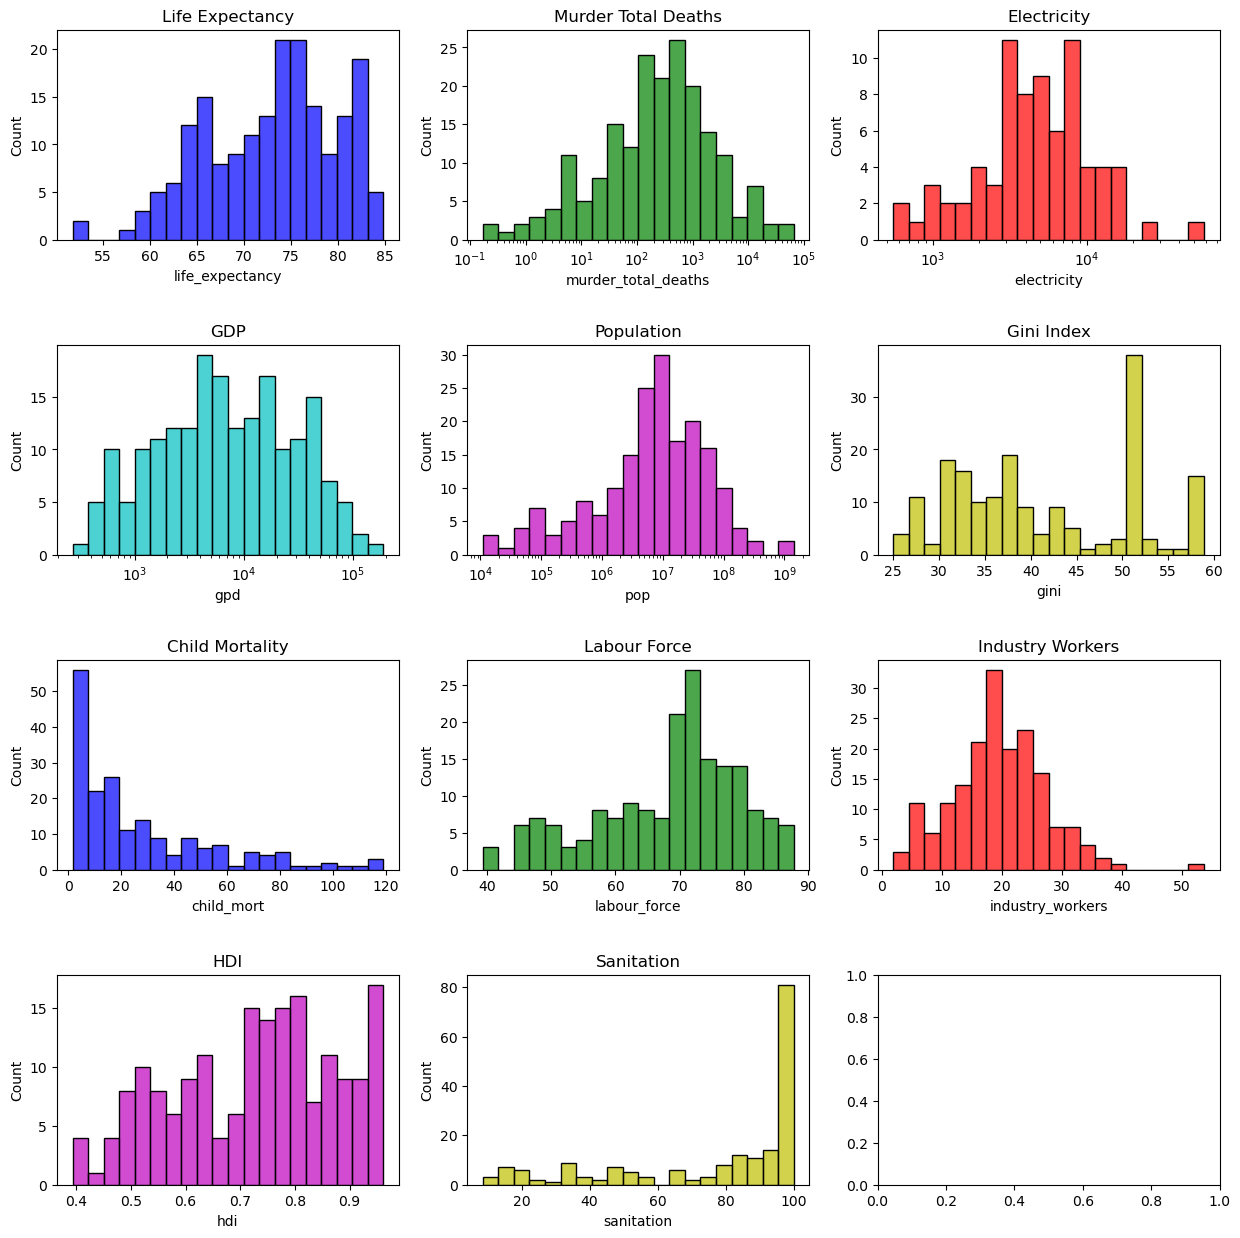

In [11]:
#seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None,
#                 discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True,
#                 shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None,
#                 cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)

# Criação de subplots para visualizar os múltiplos histogramas
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Plot de cada histograma para cada coluna usando o seaborn
sns.histplot(df["life_expectancy"], bins=20, ax=axs[0, 0], color='b', alpha=0.7)
axs[0, 0].set_title('Life Expectancy')
sns.histplot(df["murder_total_deaths"], bins=20,log_scale =True, ax=axs[0, 1], color='g', alpha=0.7)
axs[0, 1].set_title('Murder Total Deaths')
sns.histplot(df["electricity"], bins=20, ax=axs[0, 2],log_scale =True, color='r', alpha=0.7)
axs[0, 2].set_title('Electricity')

sns.histplot(df["gpd"], bins=20, ax=axs[1, 0],log_scale =True, color='c', alpha=0.7)
axs[1, 0].set_title('GDP')
sns.histplot(df["pop"], bins=20, ax=axs[1, 1],log_scale =True, color='m', alpha=0.7)
axs[1, 1].set_title('Population')
sns.histplot(df["gini"], bins=20, ax=axs[1, 2], color='y', alpha=0.7)
axs[1, 2].set_title('Gini Index')

sns.histplot(df["child_mort"], bins=20, ax=axs[2, 0], color='b', alpha=0.7)
axs[2, 0].set_title('Child Mortality')
sns.histplot(df["labour_force"], bins=20, ax=axs[2, 1], color='g', alpha=0.7)
axs[2, 1].set_title('Labour Force')
sns.histplot(df["industry_workers"], bins=20, ax=axs[2, 2], color='r', alpha=0.7)
axs[2, 2].set_title('Industry Workers')

sns.histplot(df["hdi"], bins=20, ax=axs[3, 0], color='m', alpha=0.7)
axs[3, 0].set_title('HDI')
sns.histplot(df["sanitation"], bins=20, ax=axs[3, 1], color='y', alpha=0.7)
axs[3, 1].set_title('Sanitation')

# Plots mostrados em tela
plt.show()

## Boxplots

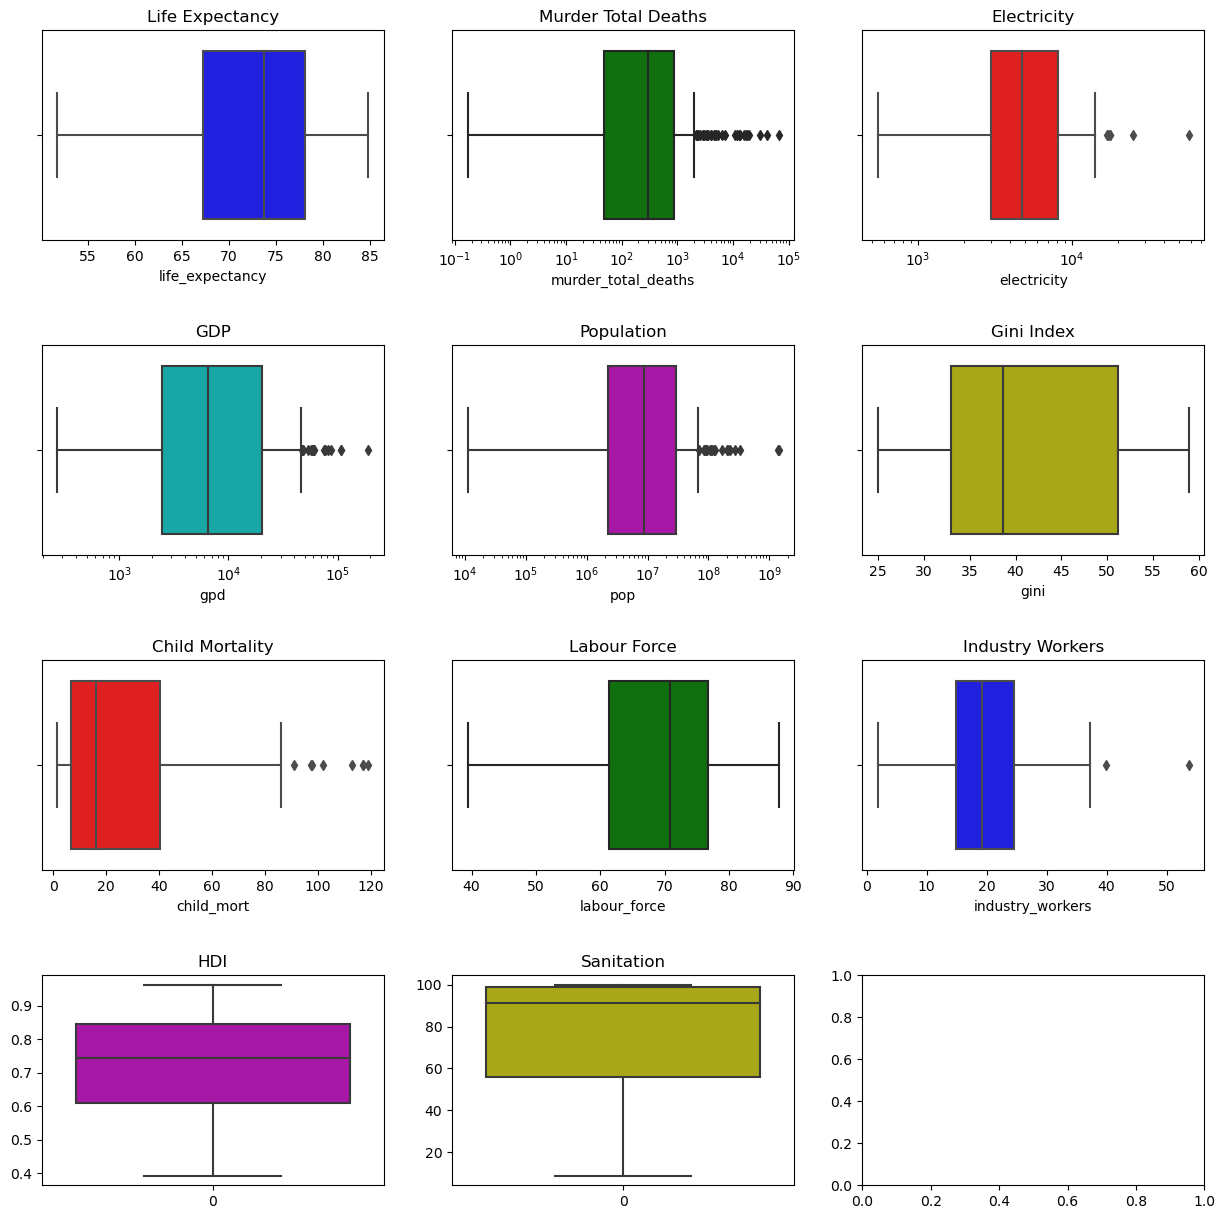

In [12]:
#seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None,
#                palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)


fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

sns.boxplot(x=df["life_expectancy"], ax=axs[0, 0], color='b')
axs[0, 0].set_title('Life Expectancy')
axs[0,1].set_xscale("log")
sns.boxplot(x=df["murder_total_deaths"], ax=axs[0, 1], color='g')
axs[0, 1].set_title('Murder Total Deaths')
axs[0,2].set_xscale("log")
sns.boxplot(x=df["electricity"], ax=axs[0, 2], color='r')
axs[0, 2].set_title('Electricity')

axs[1,0].set_xscale("log")
sns.boxplot(x=df["gpd"], ax=axs[1, 0], color='c')
axs[1, 0].set_title('GDP')
axs[1,1].set_xscale("log")
sns.boxplot(x=df["pop"], ax=axs[1, 1], color='m')
axs[1, 1].set_title('Population')
sns.boxplot(x=df["gini"], ax=axs[1, 2], color='y')
axs[1, 2].set_title('Gini Index')

sns.boxplot(x=df["child_mort"], ax=axs[2, 0], color='r')
axs[2, 0].set_title('Child Mortality')
sns.boxplot(x=df["labour_force"], ax=axs[2, 1], color='g')
axs[2, 1].set_title('Labour Force')
sns.boxplot(x=df["industry_workers"], ax=axs[2, 2], color='b')
axs[2, 2].set_title('Industry Workers')

sns.boxplot(df["hdi"], ax=axs[3, 0], color='m')
axs[3, 0].set_title('HDI')
sns.boxplot(df["sanitation"], ax=axs[3, 1], color='y')
axs[3, 1].set_title('Sanitation')

plt.show()

## Mean, Standard Deviation and Skewness

In [13]:
predictors = ['life_expectancy','murder_total_deaths','electricity','gpd','pop','gini','child_mort','labour_force','industry_workers','hdi','sanitation']

In [14]:
table = pd.DataFrame(predictors,columns=['predictors'])

In [15]:
mean = []
for p in predictors:
  mean.append(df[p].mean())
  # print(mean)
table.insert(1,'mean',mean)

In [16]:
std = []
for p in predictors:
  std.append(df[p].std())
  # print(std)
table.insert(2,'std',std)

In [17]:
skew = []
for p in predictors:
  skew.append(df[p].skew())
table.insert(3,'skew',skew)

In [18]:
display(table)

,predictors,mean,std,skew
0,life_expectancy,7.284332e+01,7.036838e+00,-0.407053
1,murder_total_deaths,2.011598e+03,6.605217e+03,6.618870
2,electricity,6.692211e+03,7.581480e+03,4.509805
3,gpd,1.679301e+04,2.424456e+04,3.132791
4,pop,3.989356e+07,1.489823e+08,8.316388
5,gini,4.126923e+01,9.726721e+00,0.246535
6,child_mort,2.716090e+01,2.746979e+01,1.430608
7,labour_force,6.829833e+01,1.113132e+01,-0.622276
8,industry_workers,1.959000e+01,7.909577e+00,0.412233
9,hdi,7.271413e-01,1.502402e-01,-0.312850


# Questão 3

In [19]:
#fig, axs = plt.subplots(6, 11, figsize=(8, 8))
#fig.suptitle('Histograms for Each Modality of the Categorical Variable', fontsize=16)

#axs = axs.flatten()

#colors = plt.cm.tab20.colors[:num_histograms]

#for i, category in enumerate(categories):
#    category_data = df[df['Categorical_Variable'] == category]['Continuous_Variable']
#    axs[i].hist(category_data, bins=15, alpha=0.7, edgecolor="black", color=colors[i])
#    axs[i].set_title(category, fontsize = 7)
#    axs[i].set_xlabel('Value', fontsize = 7)
#    axs[i].set_ylabel('Frequency', fontsize = 7)

#plt.tight_layout()
#plt.show()

In [20]:
def table_mds(continent):
  table = pd.DataFrame(predictors,columns=['predictors'])
  mean = []
  for p in predictors:
    mean.append(df.loc[df["Continent"] == continent, p].mean())
  table.insert(1,'mean',mean)

  std = []
  for p in predictors:
    std.append(df.loc[df["Continent"] == continent, p].std())
  table.insert(2,'std',std)

  skew = []
  for p in predictors:
    skew.append(df.loc[df["Continent"] == continent, p].skew())
  table.insert(3,'skew',skew)

  return table

In [21]:
def histogramPlot(continent):
  fig, axs = plt.subplots(4, 3, figsize=(15, 15))
  fig.subplots_adjust(hspace=0.5)

  sns.histplot(df.loc[df["Continent"] == continent, "life_expectancy"], bins=20, ax=axs[0, 0], color='b', alpha=0.7)
  axs[0, 0].set_title('Life Expectancy')
  axs[0,1].set_xscale("log")
  sns.histplot(df.loc[df["Continent"] == continent, "murder_total_deaths"], bins=20, ax=axs[0, 1], color='g', alpha=0.7)
  axs[0, 1].set_title('Murder Total Deaths')
  sns.histplot(df.loc[df["Continent"] == continent, "electricity"], bins=20, ax=axs[0, 2], color='r', alpha=0.7)
  axs[0, 2].set_title('Electricity')

  sns.histplot(df.loc[df["Continent"] == continent, "gpd"], bins=20, ax=axs[1, 0], color='c', alpha=0.7)
  axs[1, 0].set_title('GDP')
  axs[1,1].set_xscale("log")
  sns.histplot(df.loc[df["Continent"] == continent, "pop"], bins=20, ax=axs[1, 1], color='m', alpha=0.7)
  axs[1, 1].set_title('Population')
  sns.histplot(df.loc[df["Continent"] == continent, "gini"], bins=20, ax=axs[1, 2], color='y', alpha=0.7)
  axs[1, 2].set_title('Gini Index')

  sns.histplot(df.loc[df["Continent"] == continent, "child_mort"], bins=20, ax=axs[2, 0], color='b', alpha=0.7)
  axs[2, 0].set_title('Child Mortality')
  sns.histplot(df.loc[df["Continent"] == continent, "labour_force"], bins=20, ax=axs[2, 1], color='g', alpha=0.7)
  axs[2, 1].set_title('Labour Force')
  sns.histplot(df.loc[df["Continent"] == continent, "industry_workers"], bins=20, ax=axs[2, 2], color='r', alpha=0.7)
  axs[2, 2].set_title('Industry Workers')

  sns.histplot(df.loc[df["Continent"] == continent, "hdi"], bins=20, ax=axs[3, 0], color='m', alpha=0.7)
  axs[3, 0].set_title('HDI')
  sns.histplot(df.loc[df["Continent"] == continent, "sanitation"], bins=20, ax=axs[3, 1], color='y', alpha=0.7)
  axs[3, 1].set_title('Sanitation')

  plt.show()

In [22]:
def boxPlot(continent):
  fig, axs = plt.subplots(4, 3, figsize=(15, 15))
  fig.subplots_adjust(hspace=0.5)

  sns.boxplot(x=df.loc[df["Continent"] == continent, "life_expectancy"], ax=axs[0, 0], color='b')
  axs[0, 0].set_title('Life Expectancy')
  axs[0,1].set_xscale("log")
  sns.boxplot(x=df.loc[df["Continent"] == continent, "murder_total_deaths"], ax=axs[0, 1], color='g')
  axs[0, 1].set_title('Murder Total Deaths')
  sns.boxplot(x=df.loc[df["Continent"] == continent, "electricity"], ax=axs[0, 2], color='r')
  axs[0, 2].set_title('Electricity')

  sns.boxplot(x=df.loc[df["Continent"] == continent, "gpd"], ax=axs[1, 0], color='c')
  axs[1, 0].set_title('GDP')
  axs[1,1].set_xscale("log")
  sns.boxplot(x=df.loc[df["Continent"] == continent, "pop"], ax=axs[1, 1], color='m')
  axs[1, 1].set_title('Population')
  sns.boxplot(x=df.loc[df["Continent"] == continent, "gini"], ax=axs[1, 2], color='y')
  axs[1, 2].set_title('Gini Index')

  sns.boxplot(x=df.loc[df["Continent"] == continent, "child_mort"], ax=axs[2, 0], color='b')
  axs[2, 0].set_title('Child Mortality')
  sns.boxplot(x=df.loc[df["Continent"] == continent, "labour_force"], ax=axs[2, 1], color='g')
  axs[2, 1].set_title('Labour Force')
  sns.boxplot(x=df.loc[df["Continent"] == continent, "industry_workers"], ax=axs[2, 2], color='r')
  axs[2, 2].set_title('Industry Workers')

  sns.boxplot(x=df.loc[df["Continent"] == continent, "hdi"], ax=axs[3, 0], color='m')
  axs[3, 0].set_title('HDI')
  sns.boxplot(x=df.loc[df["Continent"] == continent, "sanitation"], ax=axs[3, 1], color='y')
  axs[3, 1].set_title('Sanitation')

  plt.show()

## Europa

In [23]:
table_europe = table_mds('Europe')
table_europe


,predictors,mean,std,skew
0,life_expectancy,7.972632e+01,3.199213e+00,-0.582726
1,murder_total_deaths,3.139355e+02,8.501423e+02,5.675240
2,electricity,8.356452e+03,1.025478e+04,4.144521
3,gpd,3.714605e+04,3.585080e+04,2.427651
4,pop,1.525941e+07,2.149643e+07,1.901479
5,gini,3.772286e+01,1.028503e+01,0.939885
6,child_mort,4.283333e+00,2.453248e+00,2.722196
7,labour_force,7.351389e+01,7.375060e+00,-1.348994
8,industry_workers,2.438333e+01,6.235818e+00,0.164663
9,hdi,8.882895e-01,5.494514e-02,-0.536042


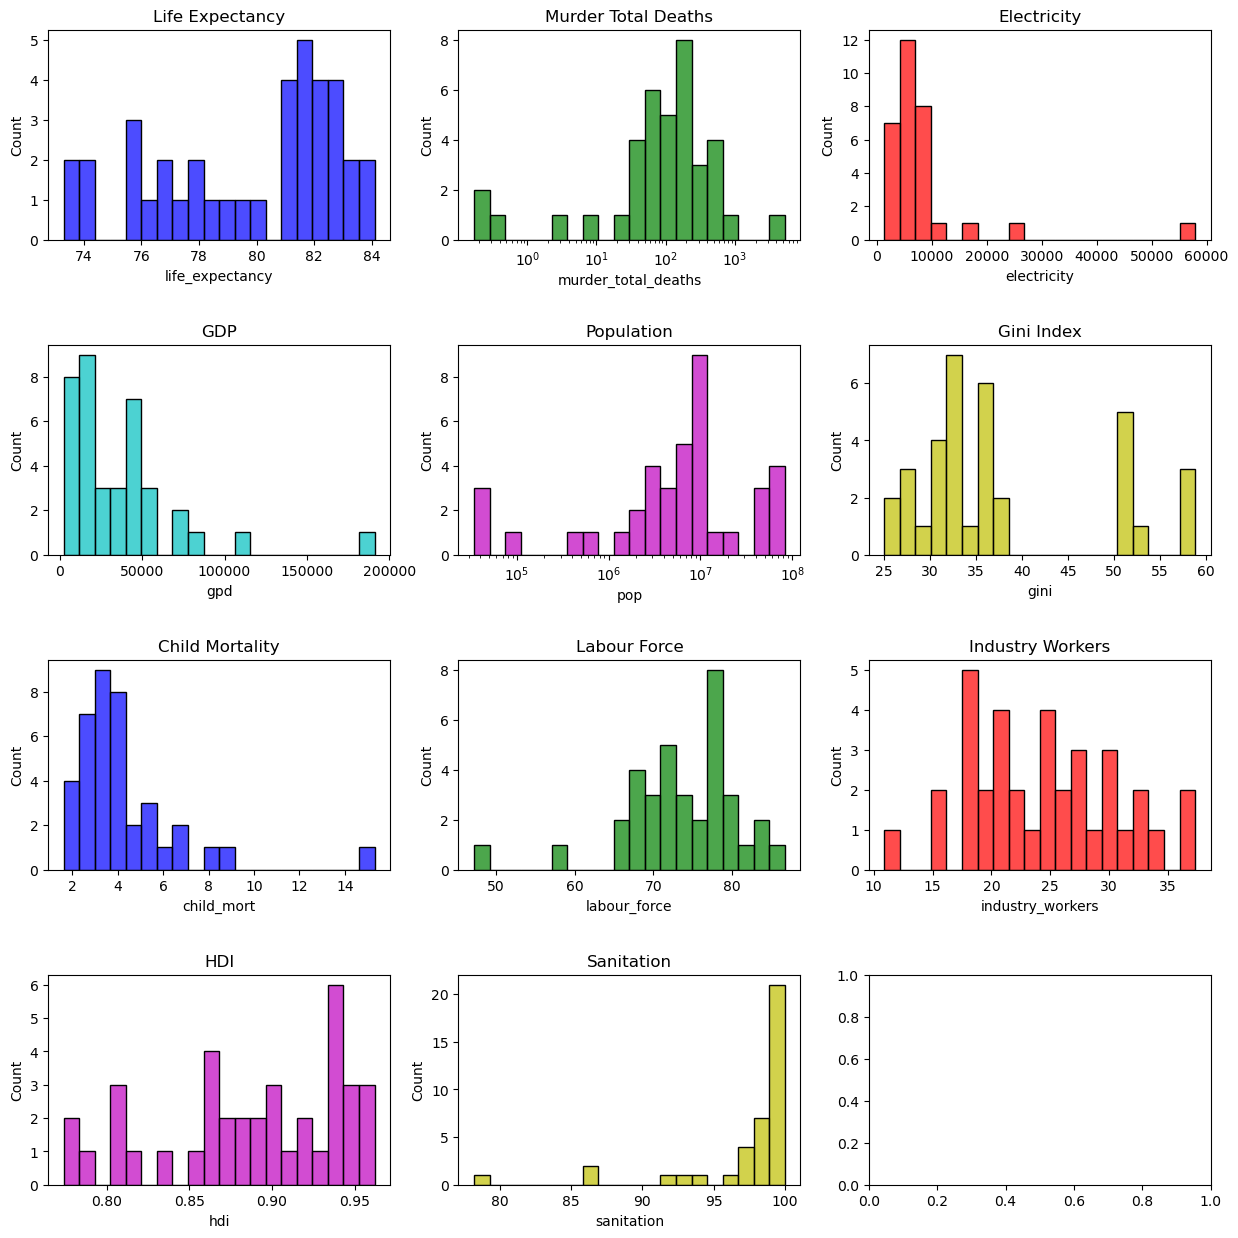

In [24]:
histogramPlot('Europe')

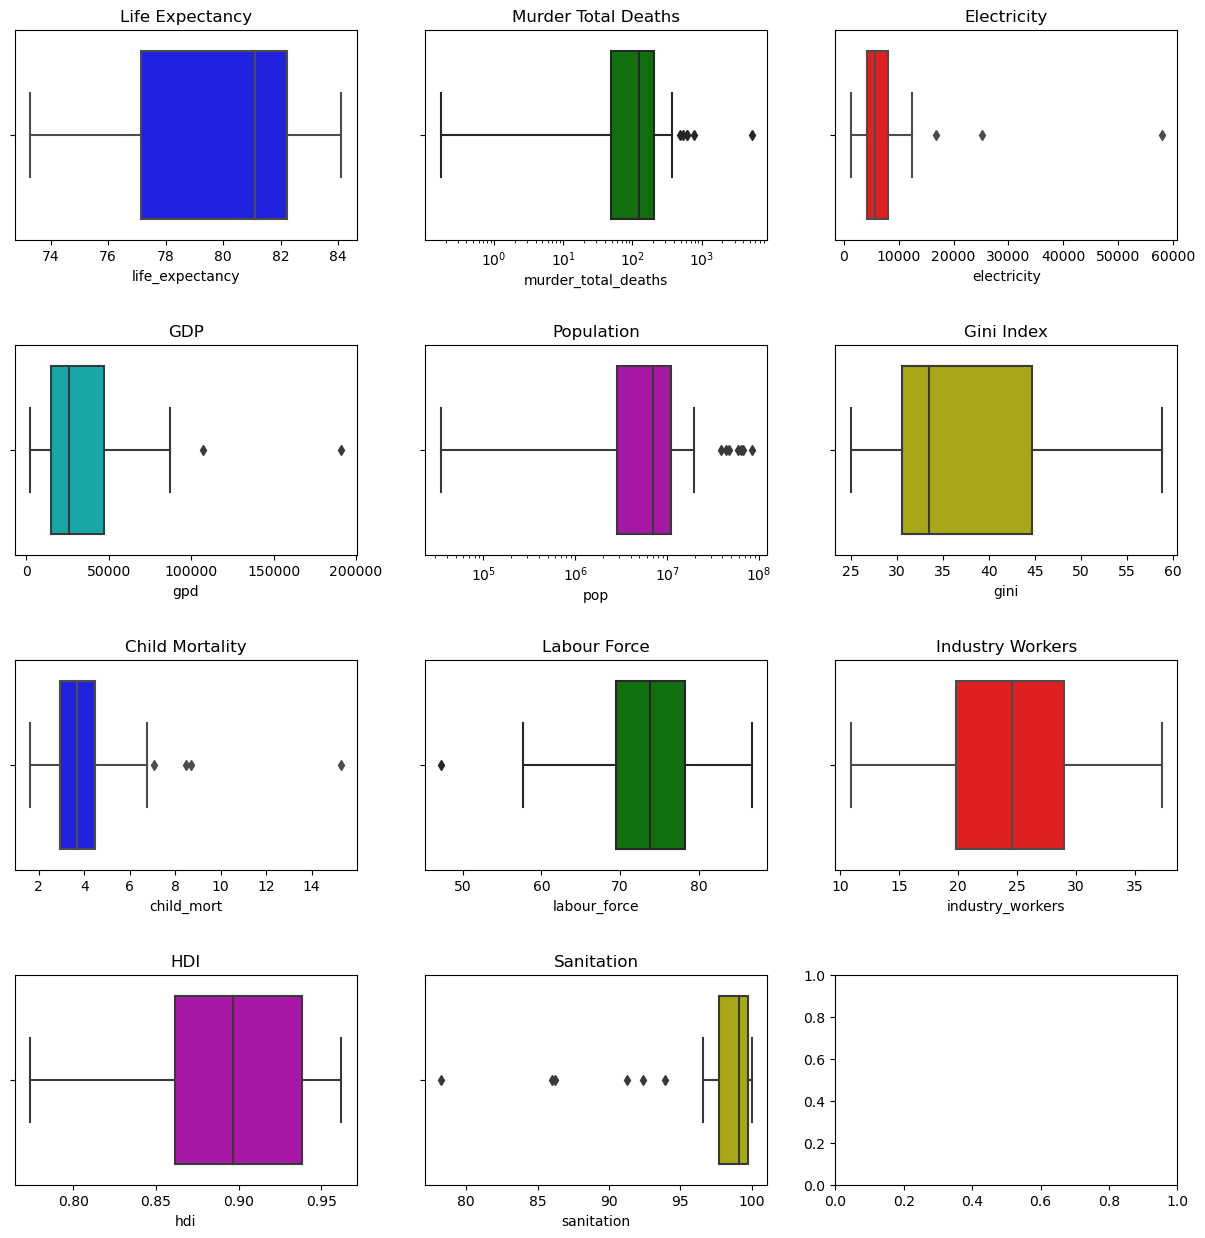

In [25]:
boxPlot('Europe')

## Africa

In [26]:
table_africa = table_mds('Africa')
table_africa

,predictors,mean,std,skew
0,life_expectancy,6.578679e+01,5.361581e+00,-0.040276
1,murder_total_deaths,1.543970e+03,3.237291e+03,4.159423
2,electricity,2.325000e+03,1.382715e+03,1.479400
3,gpd,2.608451e+03,3.132699e+03,2.674228
4,pop,2.462806e+07,3.582817e+07,3.077660
5,gini,4.409811e+01,9.849043e+00,-0.176010
6,child_mort,5.867925e+01,2.860935e+01,0.358476
7,labour_force,6.587500e+01,1.179767e+01,-0.118182
8,industry_workers,1.411173e+01,7.603269e+00,0.479408
9,hdi,5.679231e-01,1.062093e-01,0.571315


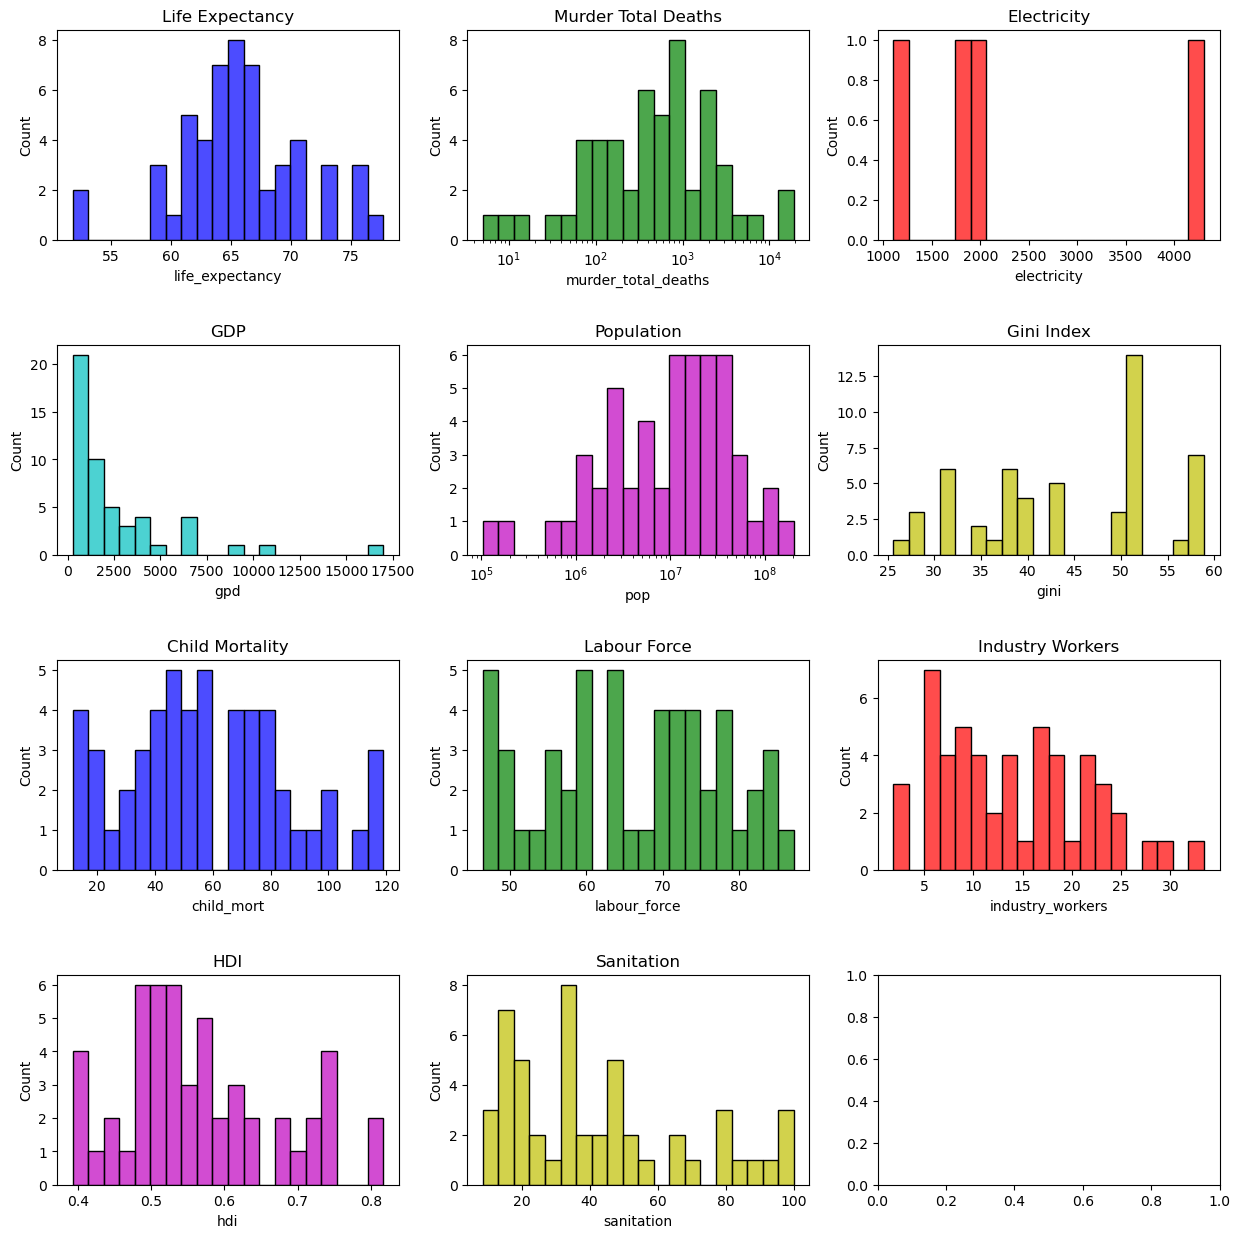

In [27]:
histogramPlot('Africa')

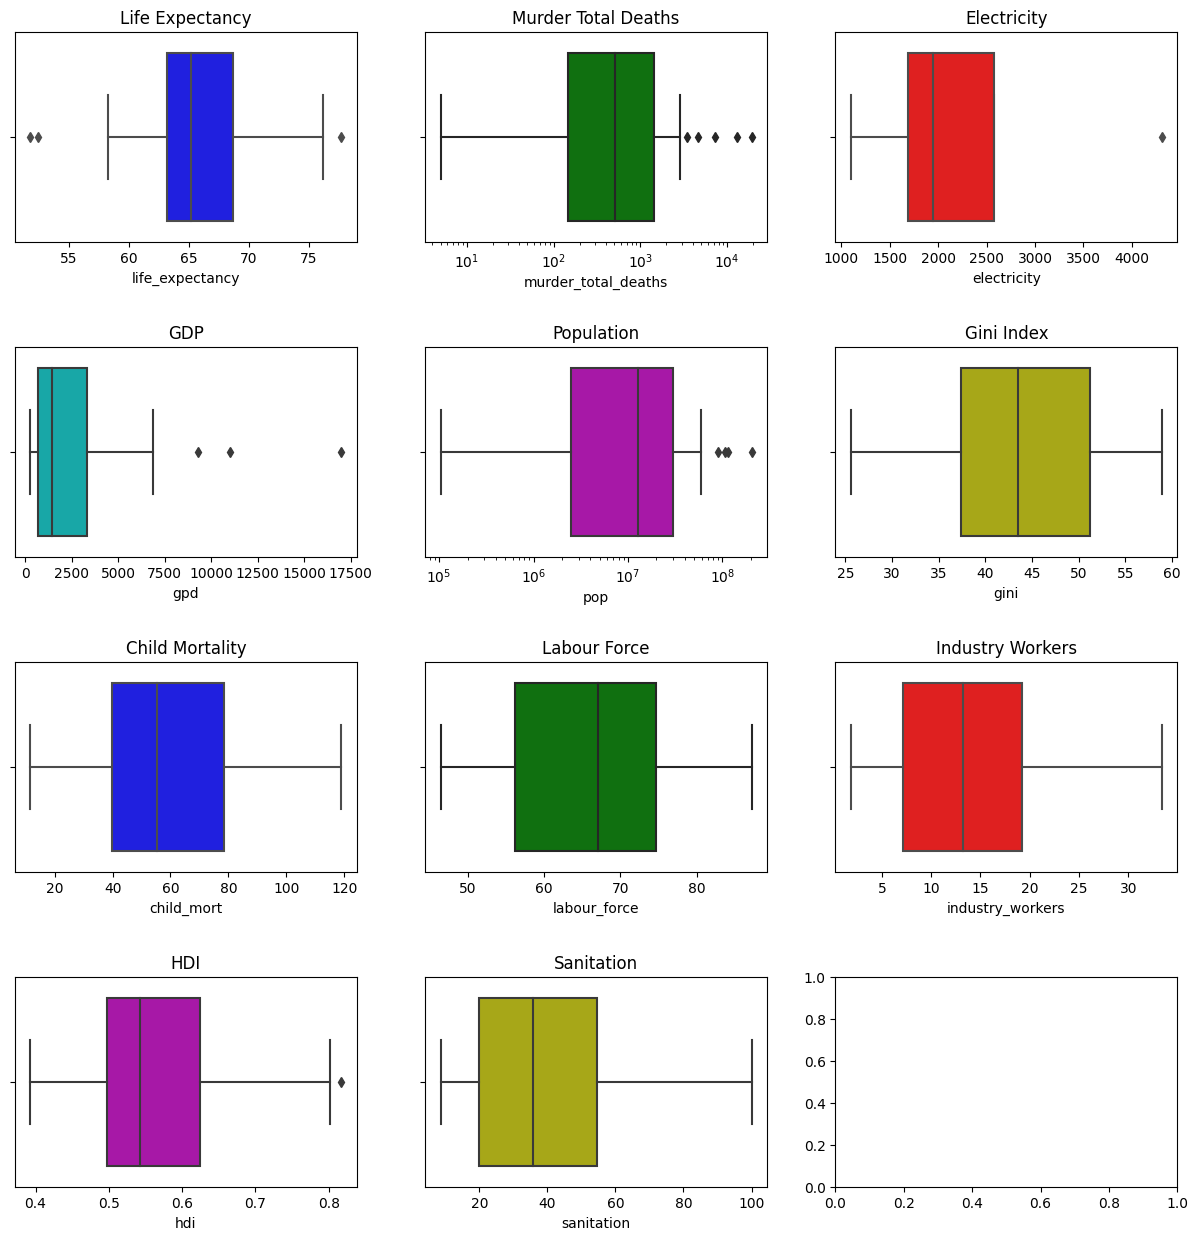

In [ ]:
boxPlot('Africa')

## South America

In [ ]:
table_samerica = table_mds('South America')
table_samerica

,predictors,mean,std,skew
0,life_expectancy,7.588333e+01,3.818099e+00,-0.924611
1,murder_total_deaths,8.541733e+03,1.881368e+04,3.035090
2,electricity,2.661429e+03,1.025401e+03,0.625051
3,gpd,8.607273e+03,3.969814e+03,0.833303
4,pop,3.567992e+07,5.796333e+07,2.978294
5,gini,4.495833e+01,9.565512e+00,-0.091331
6,child_mort,1.653917e+01,7.355471e+00,0.448470
7,labour_force,6.980833e+01,7.242358e+00,-0.590056
8,industry_workers,1.980833e+01,3.116367e+00,0.201758
9,hdi,7.700833e-01,5.094464e-02,0.715570


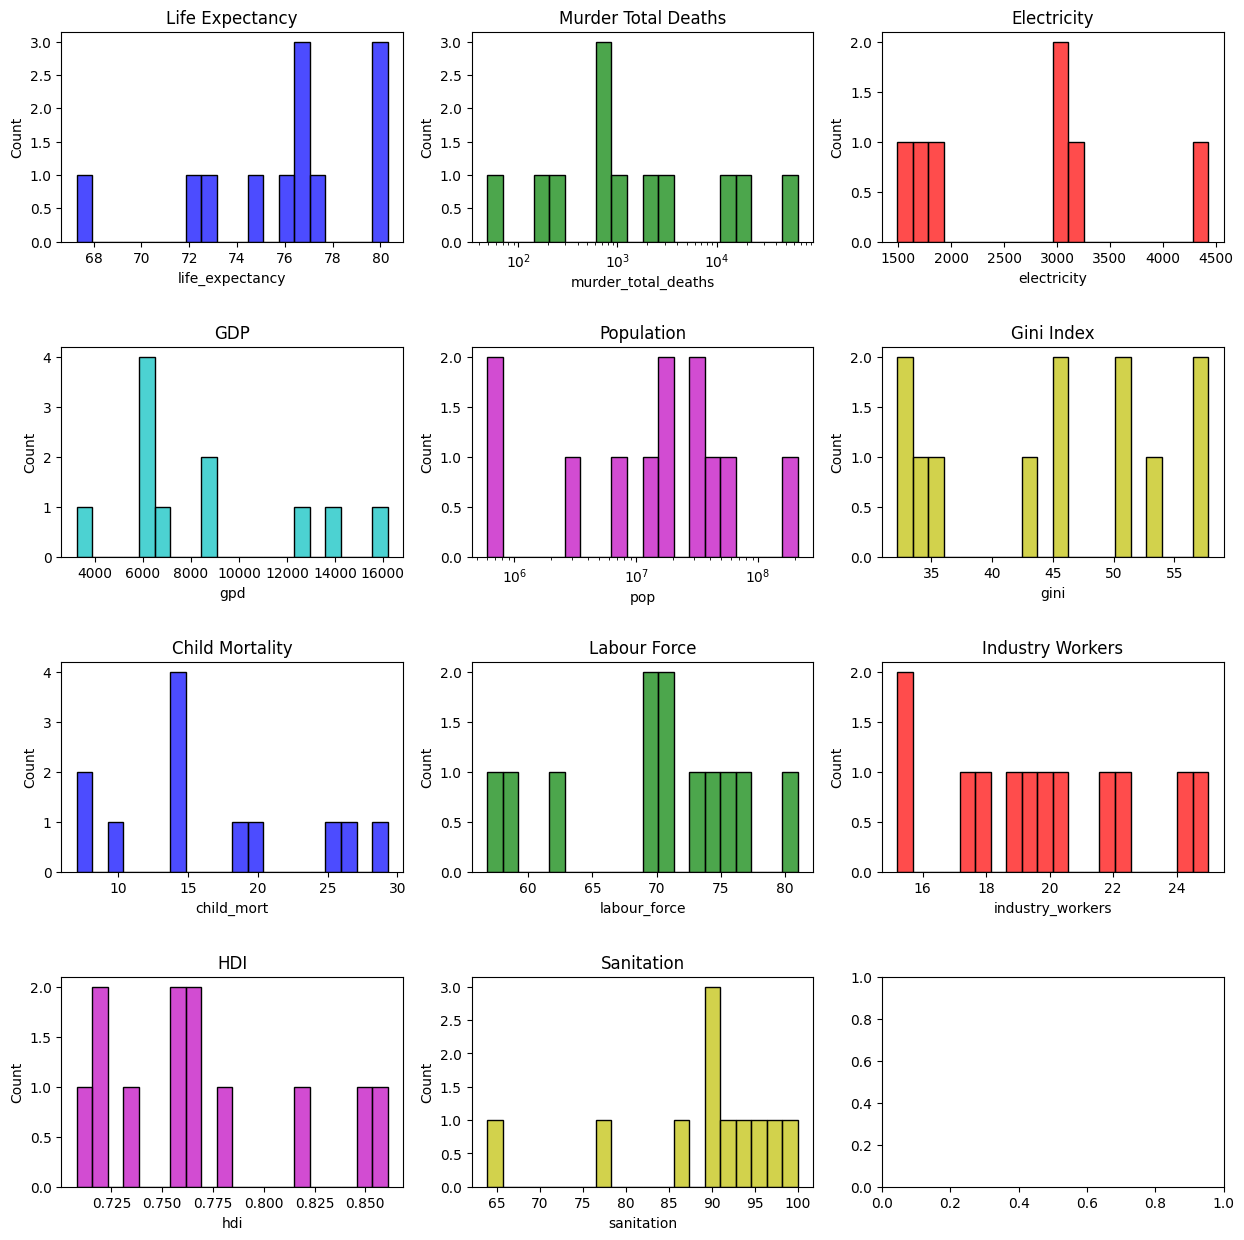

In [ ]:
histogramPlot('South America')

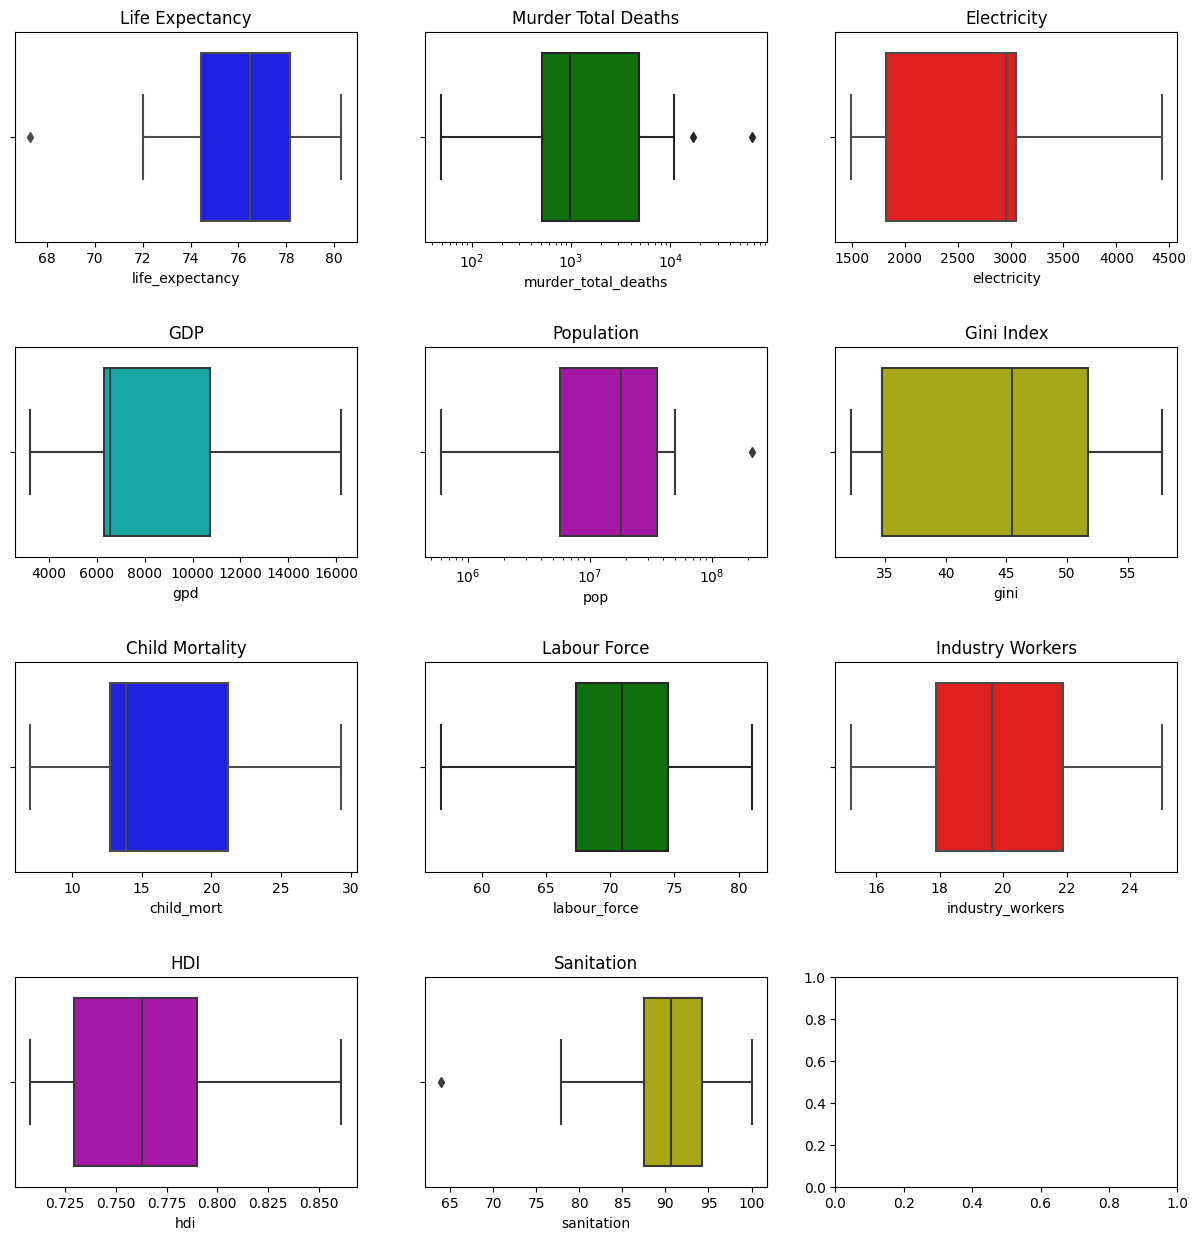

In [ ]:
boxPlot('South America')

## North America

In [ ]:
table_namerica = table_mds('North America')
table_namerica

,predictors,mean,std,skew
0,life_expectancy,7.503043e+01,3.728445e+00,-0.759272
1,murder_total_deaths,2.633055e+03,6.642332e+03,3.584859
2,electricity,1.047750e+04,6.460704e+03,-0.143370
3,gpd,2.270710e+04,2.435830e+04,2.032514
4,pop,2.544488e+07,7.217334e+07,3.992451
5,gini,4.272174e+01,8.924886e+00,-0.072346
6,child_mort,1.667043e+01,1.244663e+01,2.623505
7,labour_force,7.027619e+01,6.792562e+00,-0.987453
8,industry_workers,1.819048e+01,4.209502e+00,-0.453866
9,hdi,7.600435e-01,9.026400e-02,-0.279036


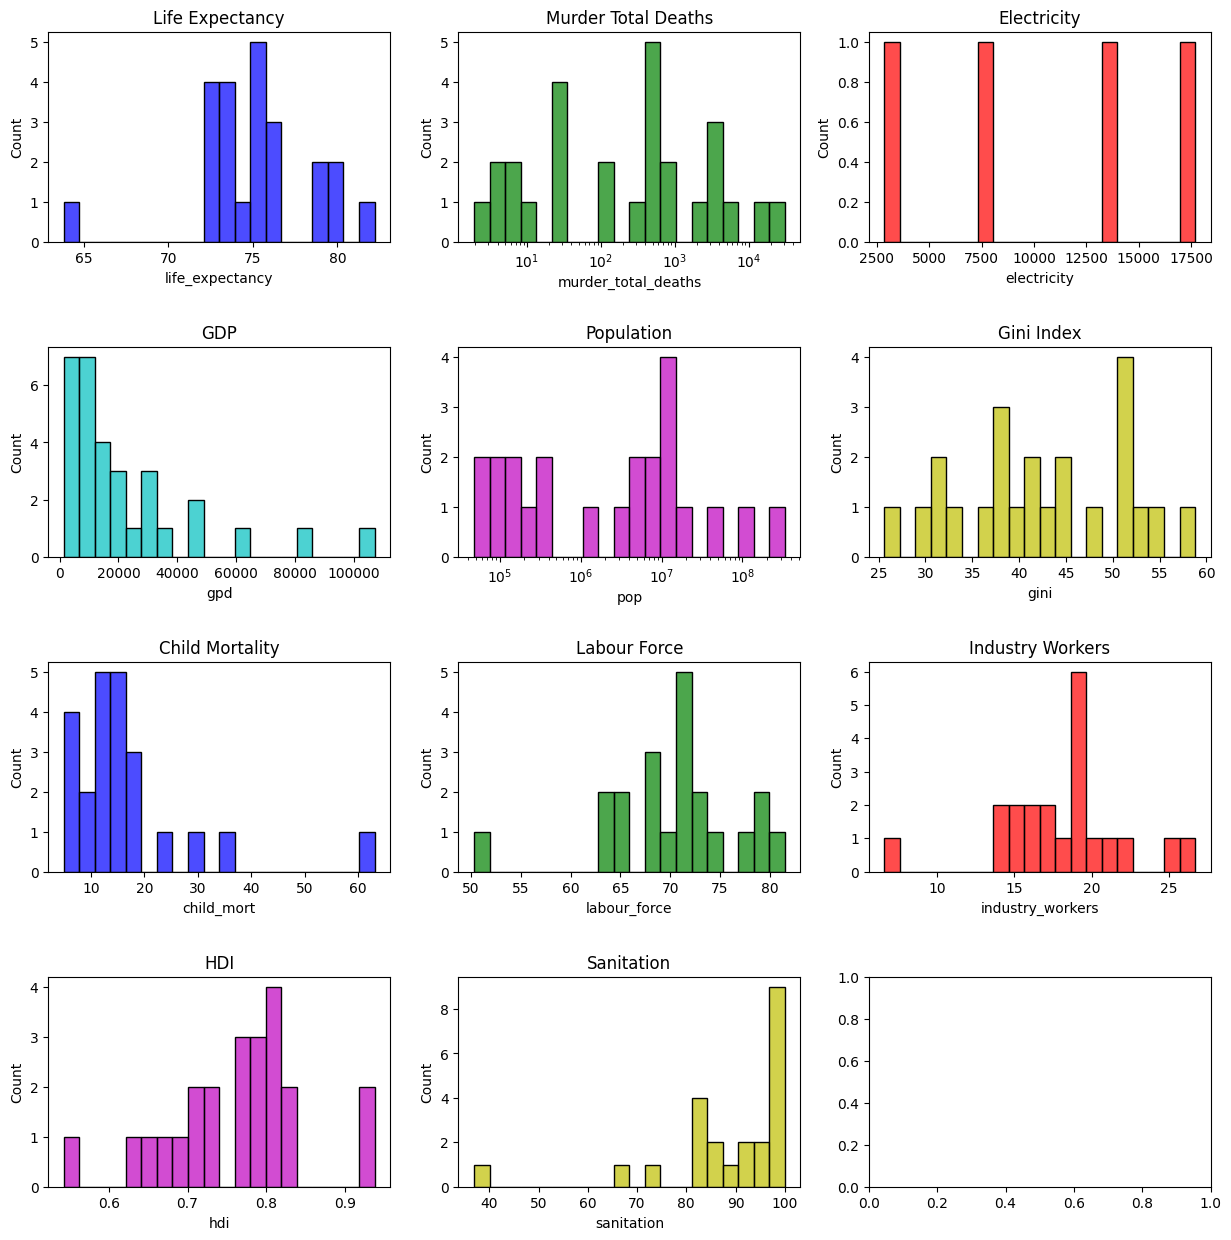

In [ ]:
histogramPlot('North America')

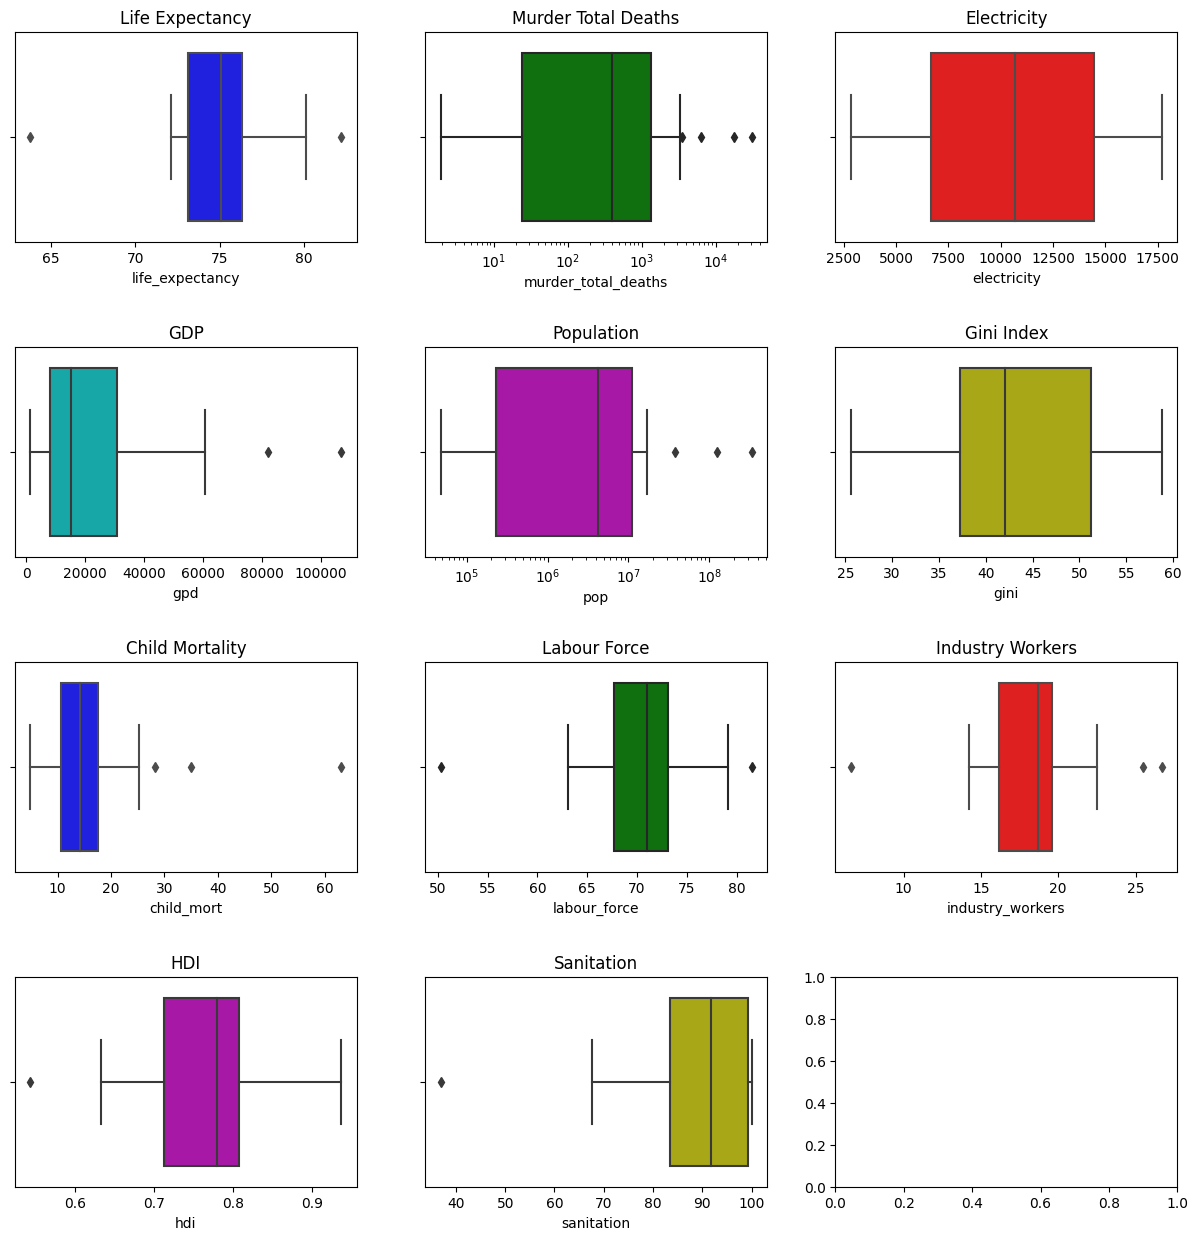

In [ ]:
boxPlot('North America')

## Asia

In [ ]:
table_asia = table_mds('Asia')
table_asia

,predictors,mean,std,skew
0,life_expectancy,7.476383e+01,4.903966e+00,0.233500
1,murder_total_deaths,2.595718e+03,6.735577e+03,4.603643
2,electricity,5.710643e+03,4.858194e+03,1.172913
3,gpd,1.487707e+04,1.853708e+04,1.720162
4,pop,9.667574e+07,2.837063e+08,4.391564
5,gini,3.971277e+01,8.898476e+00,0.493915
6,child_mort,1.924489e+01,1.612353e+01,1.309955
7,labour_force,6.638542e+01,1.318660e+01,-0.408919
8,industry_workers,2.274354e+01,8.200751e+00,1.119455
9,hdi,7.532609e-01,1.209271e-01,-0.377283


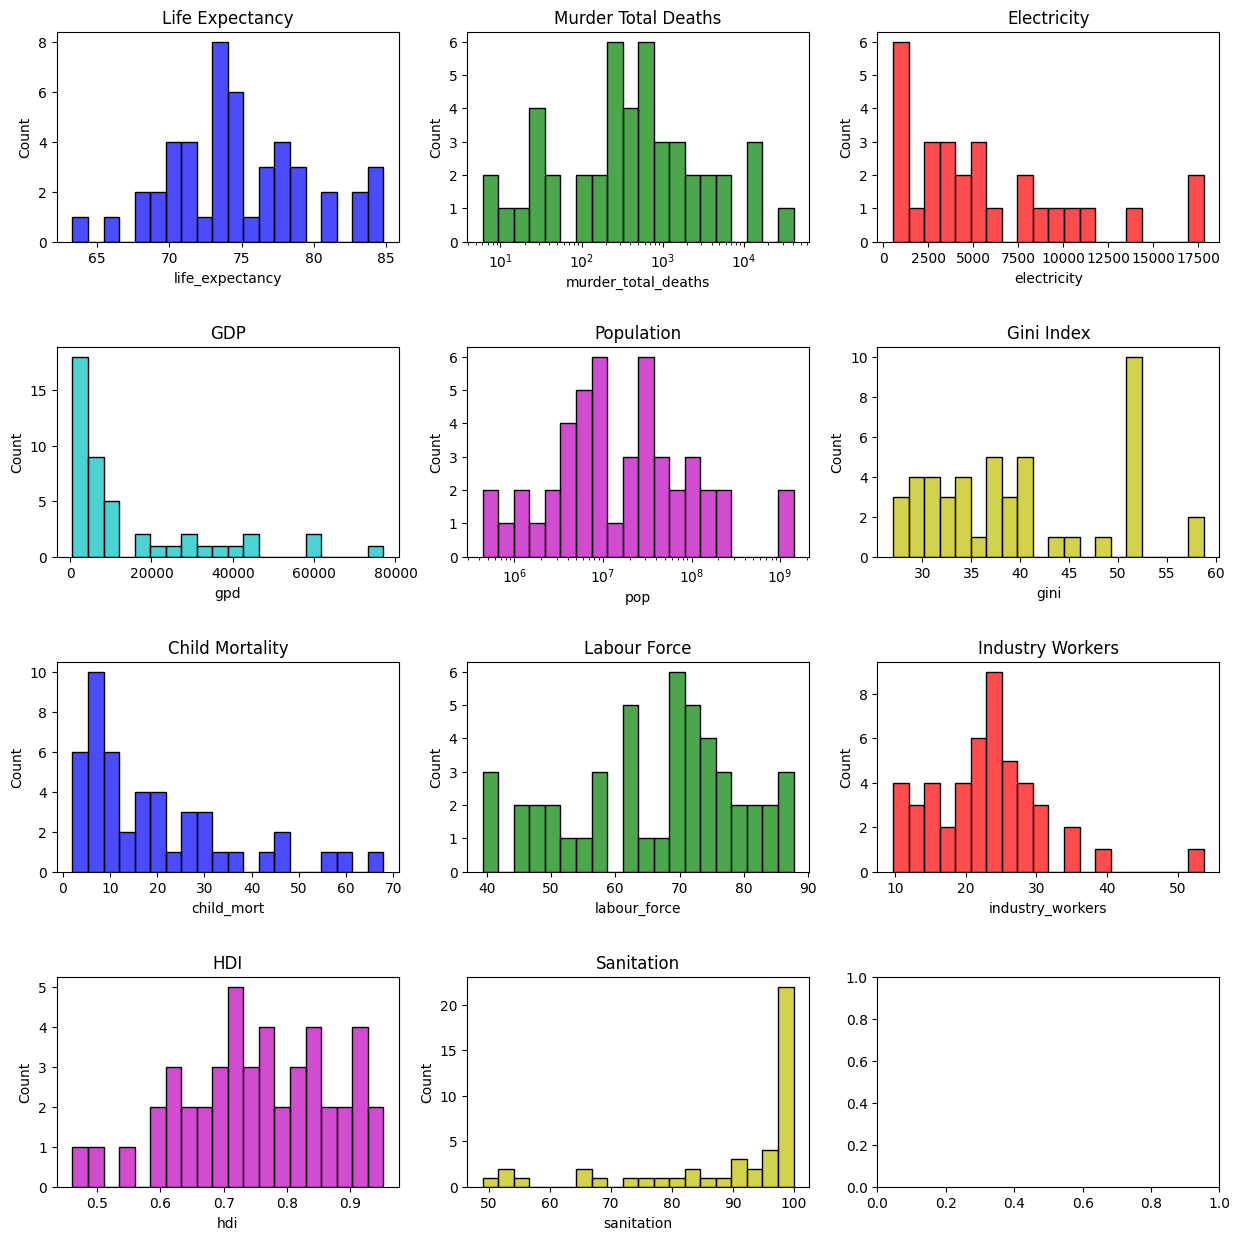

In [ ]:
histogramPlot('Asia')

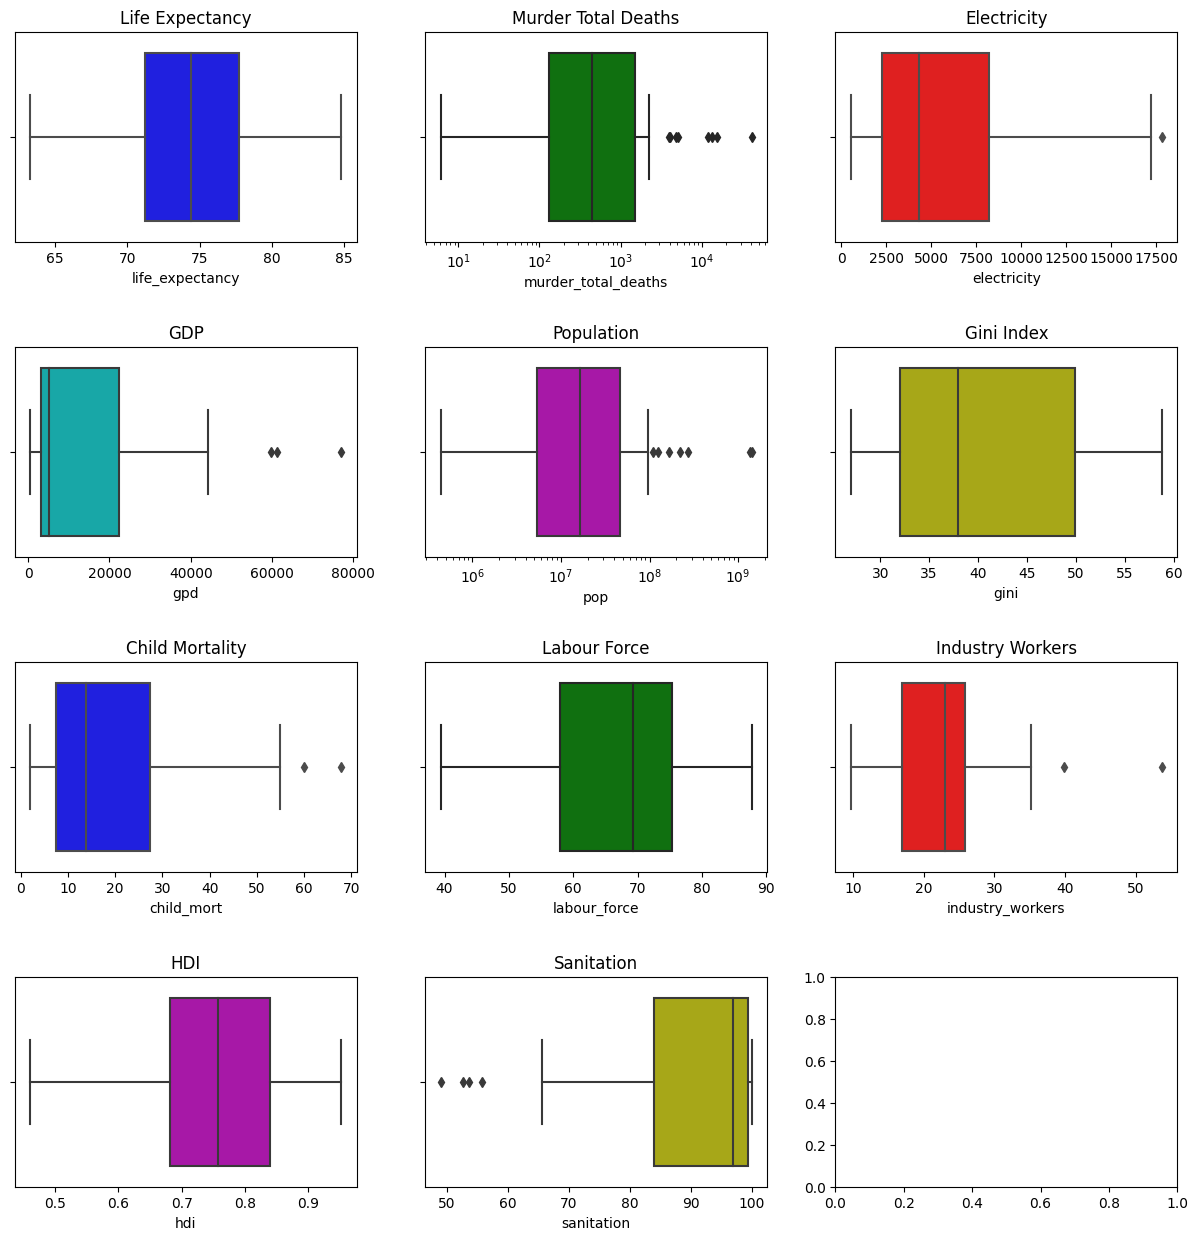

In [ ]:
boxPlot('Asia')

## Oceania

In [ ]:
table_oceania = table_mds('Oceania')
table_oceania

,predictors,mean,std,skew
0,life_expectancy,6.822857e+01,6.974837e+00,1.154263
1,murder_total_deaths,8.717941e+01,2.432666e+02,3.565362
2,electricity,9.910000e+03,8.343860e+02,NaN
3,gpd,1.372833e+04,1.609637e+04,1.763497
4,pop,3.031050e+06,6.981451e+06,2.960923
5,gini,3.874167e+01,8.610296e+00,0.447115
6,child_mort,2.448571e+01,1.348223e+01,0.449450
7,labour_force,6.560909e+01,1.362097e+01,-0.147682
8,industry_workers,1.847273e+01,5.887290e+00,1.146605
9,hdi,7.026923e-01,1.247106e-01,0.989666


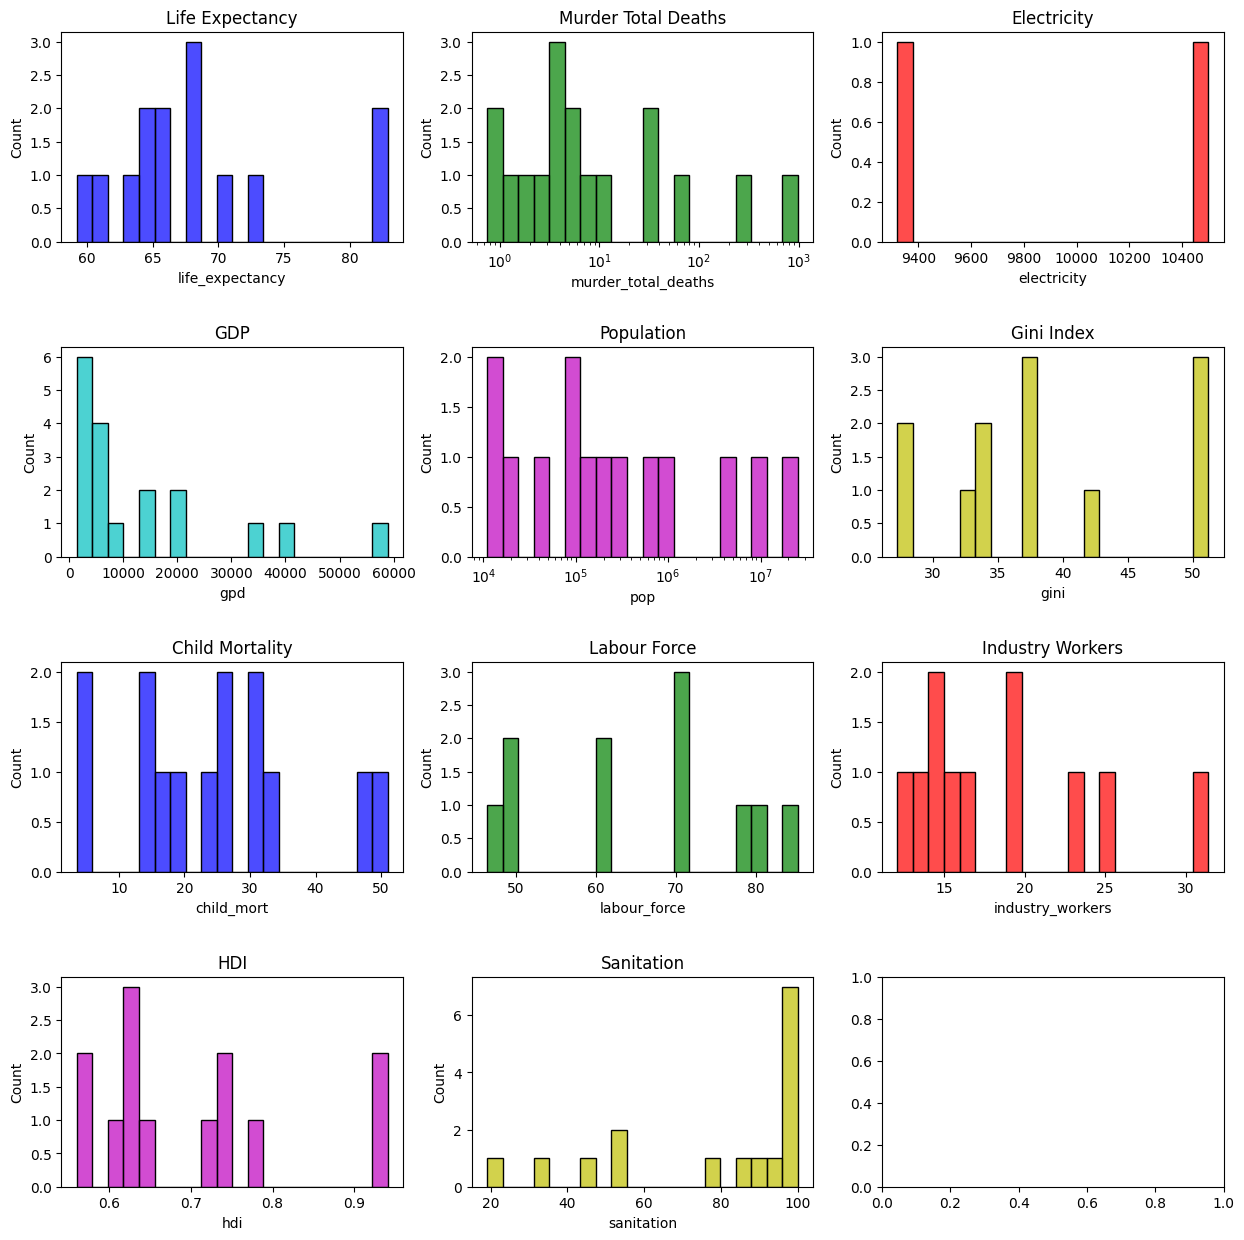

In [ ]:
histogramPlot('Oceania')

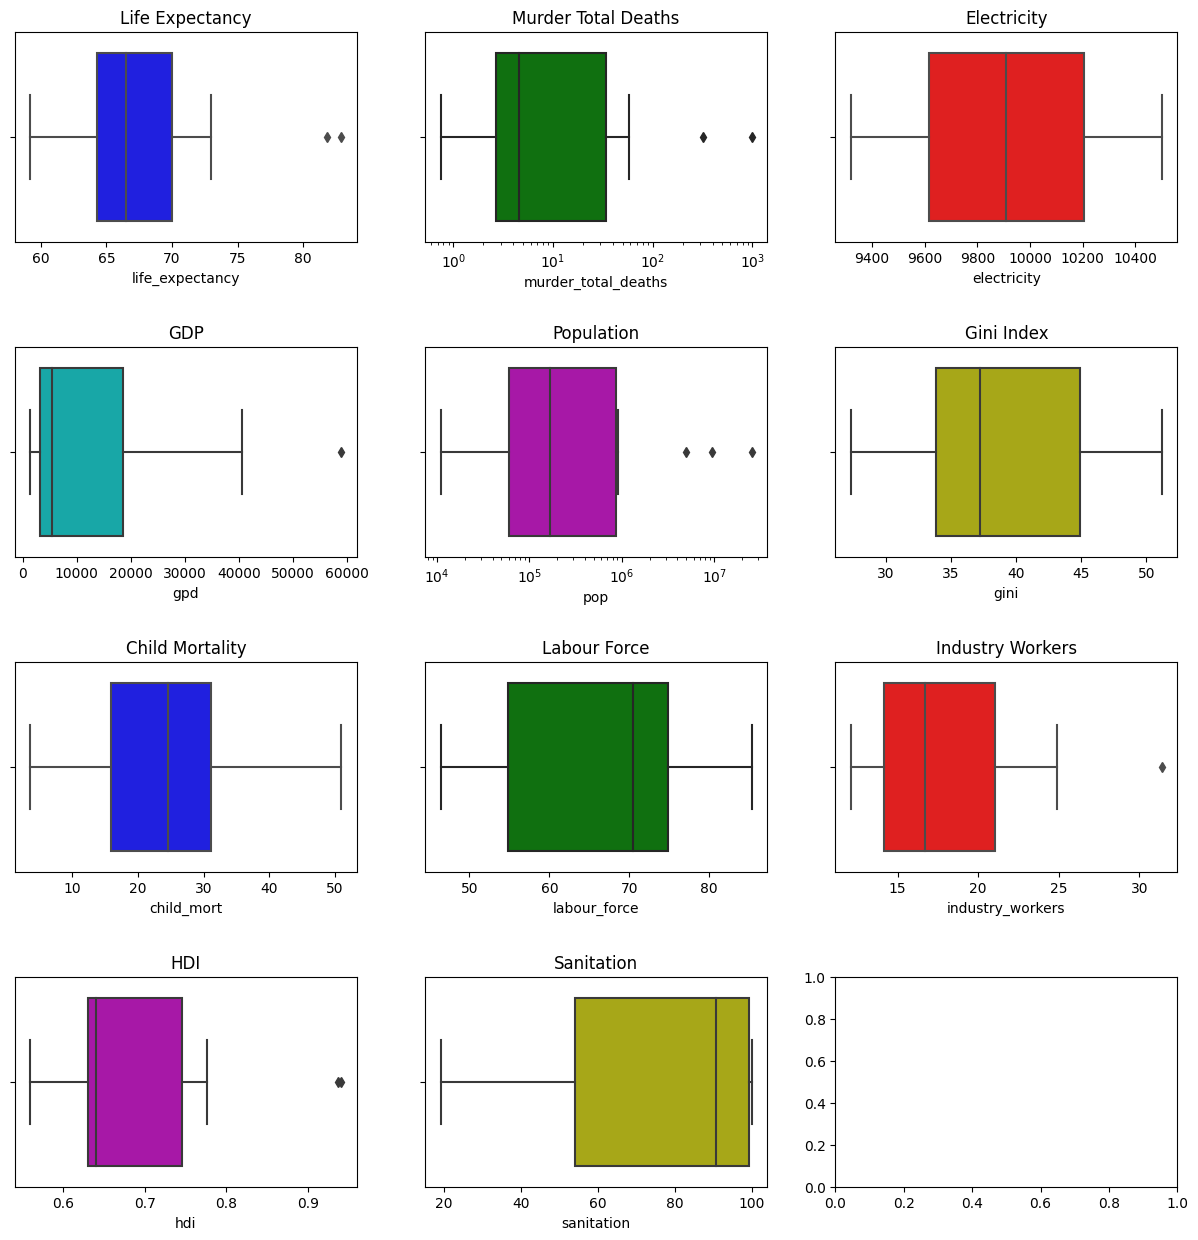

In [ ]:
boxPlot('Oceania')

#Question 4

<ipython-input-44-f281c74f042e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


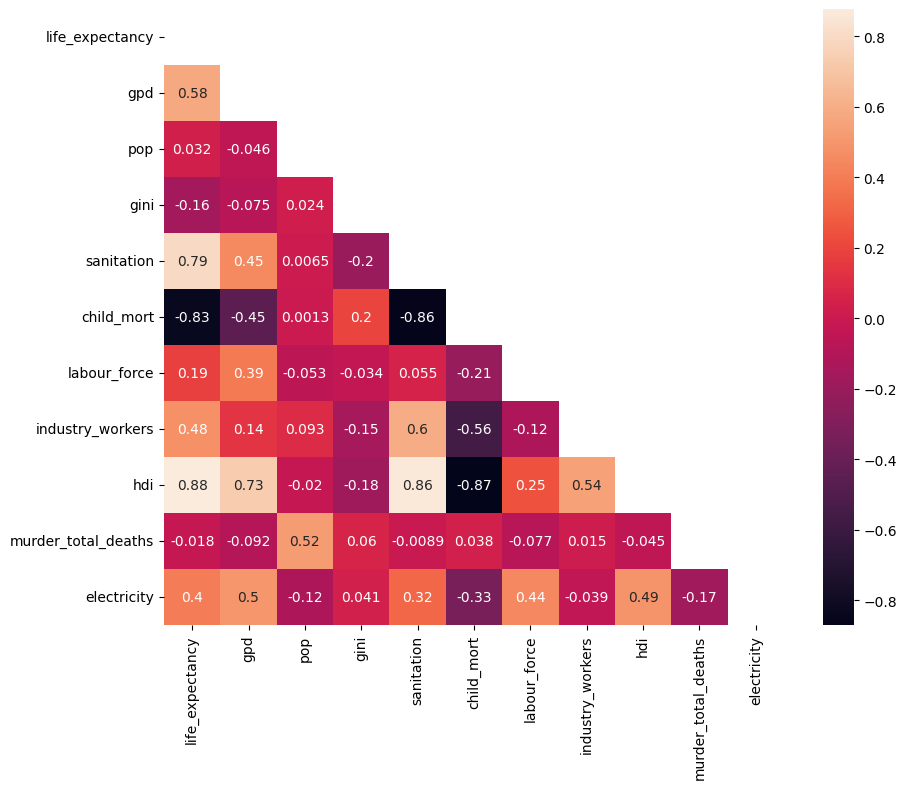

In [ ]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, ax=ax,mask=mask)
plt.show()

correlação positiva muito alta :
(life_expectancy,hdi)
(life_expectancy,sanitation)
(sanitation,hdi)

correlação negativa muito alta :
(life_expectancy,child_mort)
(hdi,child_mort)
(sanitation,child_mort)

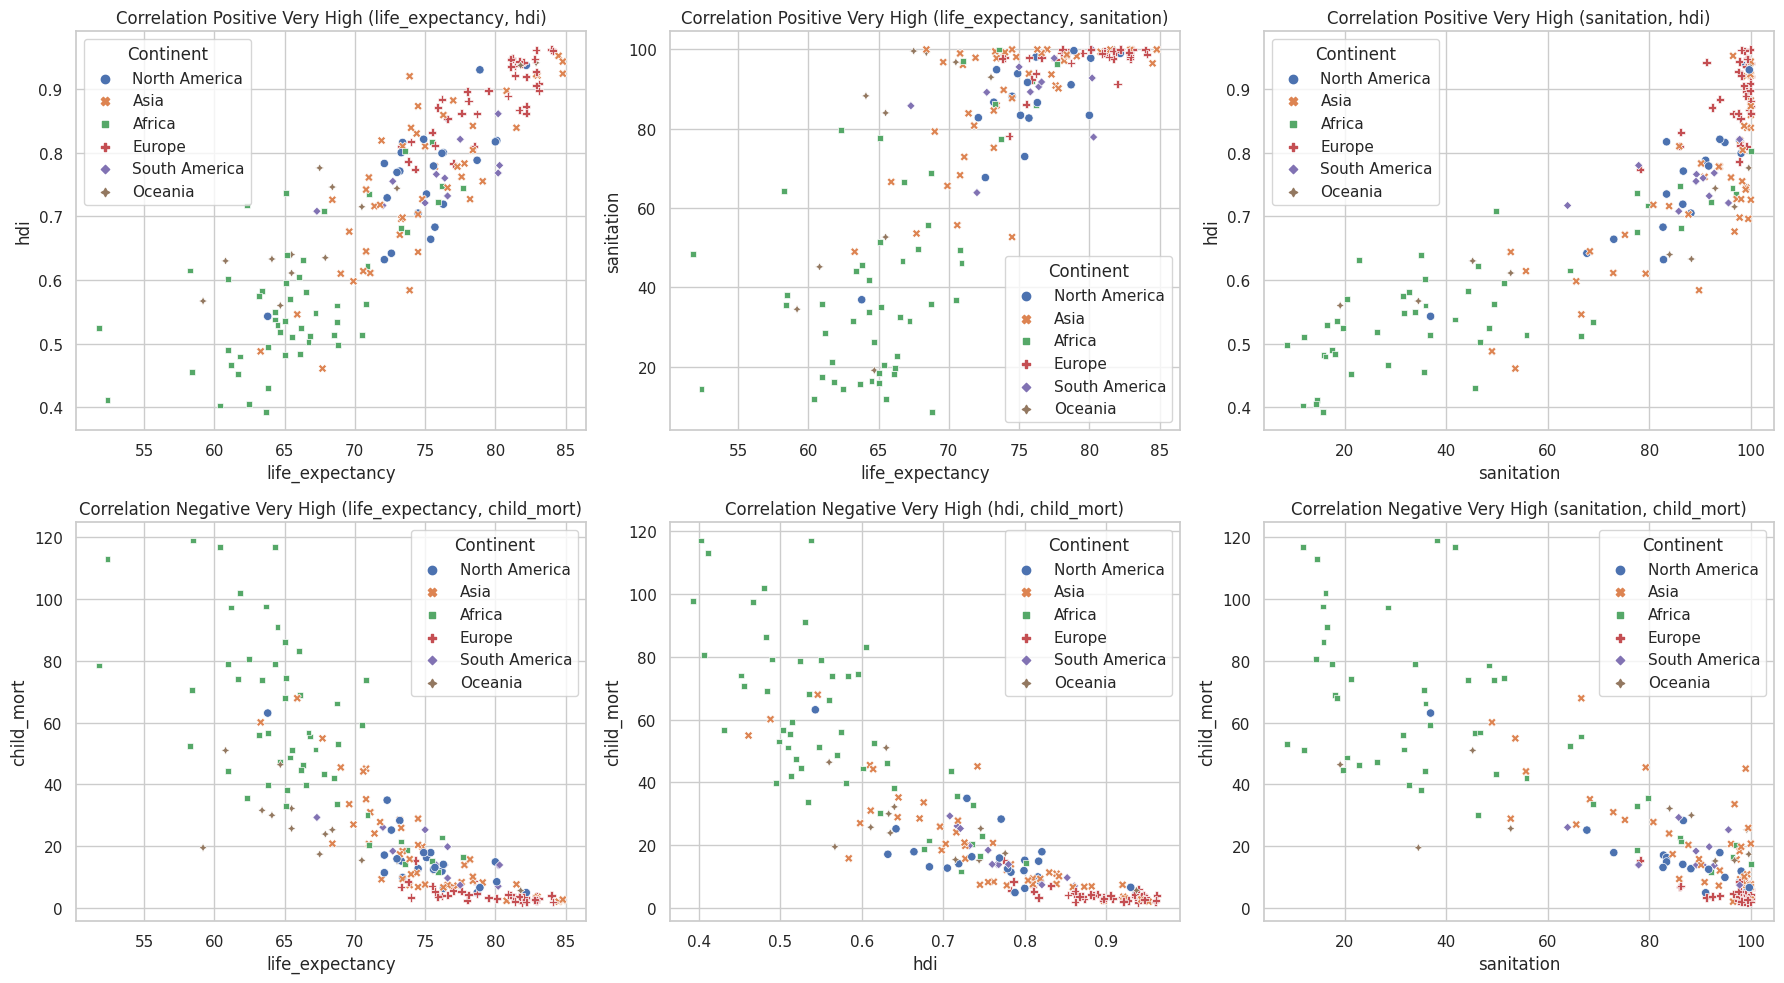

In [ ]:
# @title
#seaborn.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None,
#                    palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None,
#                    size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)

# Set the style of the plots
sns.set(style="whitegrid")

# Create a DataFrame with the required data (assuming df is your DataFrame)
data = df[['life_expectancy', 'hdi', 'sanitation', 'child_mort', 'gpd', 'murder_total_deaths', 'pop', 'industry_workers','Continent']]

# Create subplots for different correlation levels
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Correlation Positive Very High
sns.scatterplot(x='life_expectancy', y='hdi', data=data, ax=axes[0, 0], hue = "Continent",style = "Continent")
axes[0, 0].set_title('Correlation Positive Very High (life_expectancy, hdi)')

sns.scatterplot(x='life_expectancy', y='sanitation', data=data, ax=axes[0, 1],hue = "Continent",style = "Continent")
axes[0, 1].set_title('Correlation Positive Very High (life_expectancy, sanitation)')

sns.scatterplot(x='sanitation', y='hdi', data=data, ax=axes[0, 2],hue = "Continent",style = "Continent")
axes[0, 2].set_title('Correlation Positive Very High (sanitation, hdi)')

# Correlation Negative Very High
sns.scatterplot(x='life_expectancy', y='child_mort', data=data, ax=axes[1, 0],hue = "Continent",style = "Continent")
axes[1, 0].set_title('Correlation Negative Very High (life_expectancy, child_mort)')

sns.scatterplot(x='hdi', y='child_mort', data=data, ax=axes[1, 1],hue = "Continent",style = "Continent")
axes[1, 1].set_title('Correlation Negative Very High (hdi, child_mort)')

sns.scatterplot(x='sanitation', y='child_mort', data=data, ax=axes[1, 2],hue = "Continent",style = "Continent")
axes[1, 2].set_title('Correlation Negative Very High (sanitation, child_mort)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



correlação positiva alta :
(life_expectancy,gpd)
(murder_total_deaths,pop)
(gpd,hdi)
(industry_workers,hdi)
(industry_workers,sanitation)

correlação negativa alta :
(industry_workers,child_mort)




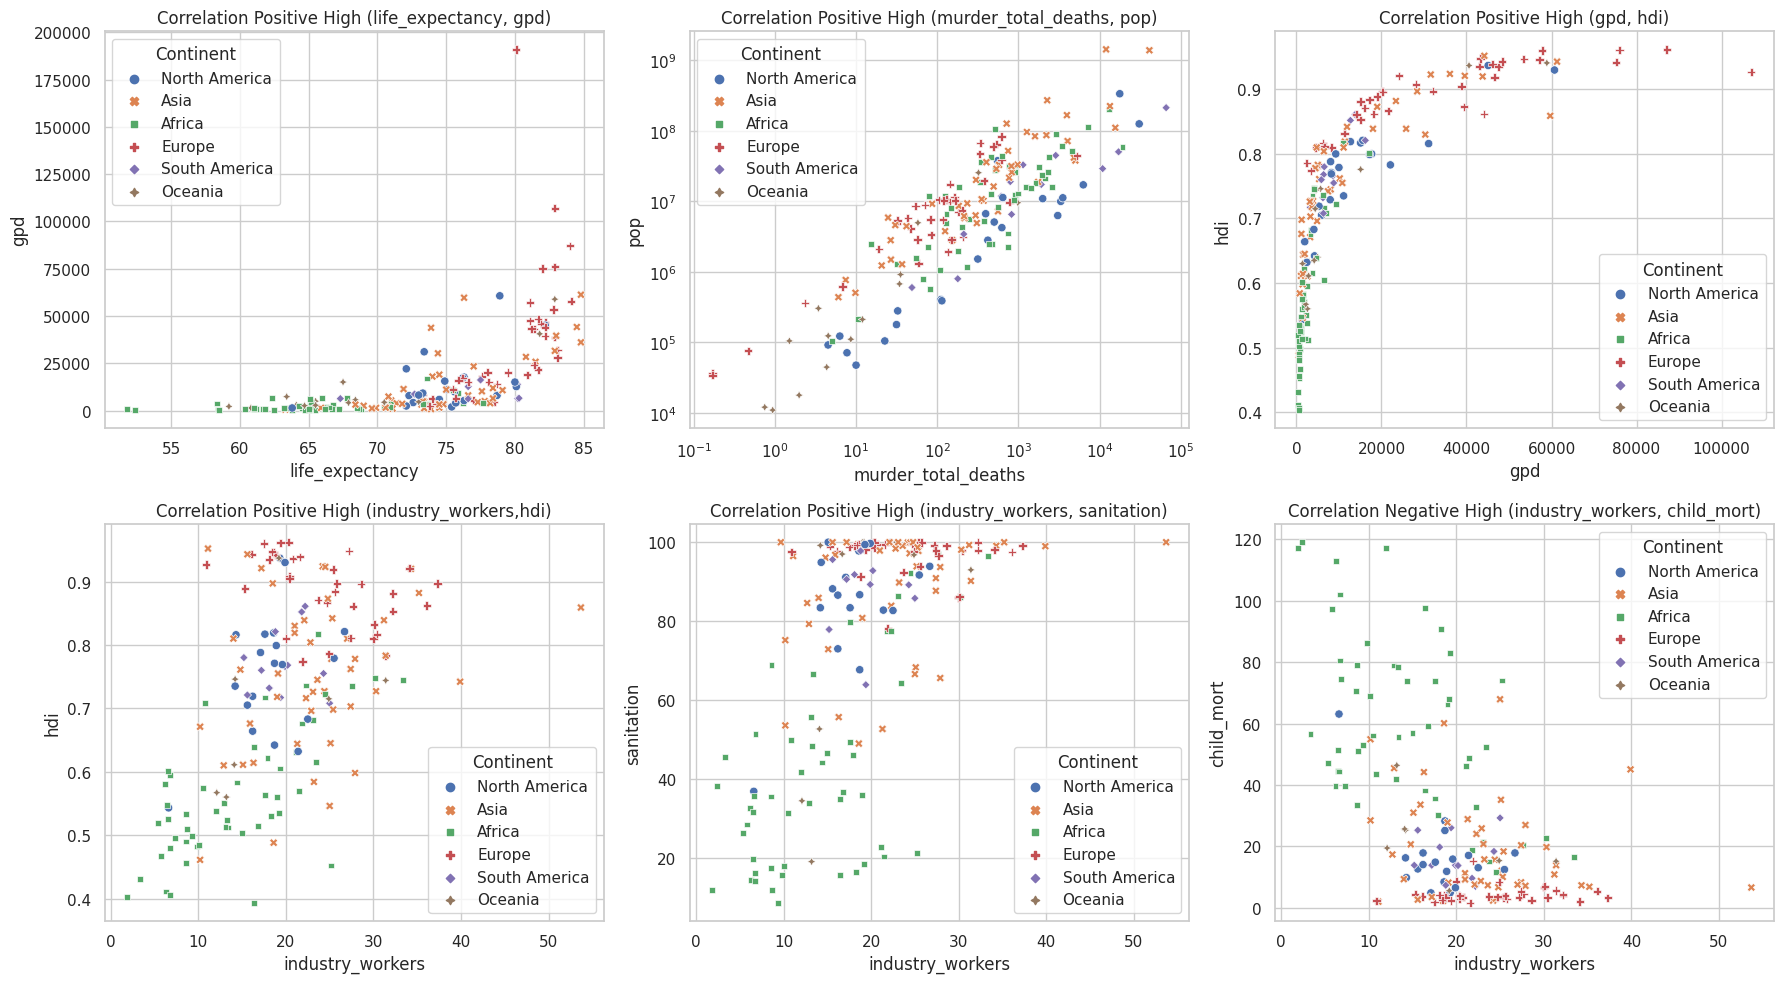

In [ ]:
 sns.set(style="whitegrid")

# Create a DataFrame with the required data (assuming df is your DataFrame)
data = df[['life_expectancy', 'hdi', 'sanitation', 'child_mort', 'gpd', 'murder_total_deaths', 'pop', 'industry_workers','Continent']]

# Create subplots for different correlation levels
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Correlation Positive High
# axes[0,0].set_yscale("log")
sns.scatterplot(x='life_expectancy', y='gpd', data=data, ax=axes[0, 0], hue = "Continent",style = "Continent")
axes[0, 0].set_title('Correlation Positive High (life_expectancy, gpd)')

axes[0,1].set_xscale("log")
axes[0,1].set_yscale("log")
sns.scatterplot(x='murder_total_deaths', y='pop', data=data, ax=axes[0, 1],hue = "Continent",style = "Continent")
axes[0, 1].set_title('Correlation Positive High (murder_total_deaths, pop)')

sns.scatterplot(x='gpd', y='hdi', data=data, ax=axes[0, 2],hue = "Continent",style = "Continent")
axes[0, 2].set_title('Correlation Positive High (gpd, hdi)')

sns.scatterplot(x='industry_workers', y='hdi', data=data, ax=axes[1, 0],hue = "Continent",style = "Continent")
axes[1, 0].set_title('Correlation Positive High (industry_workers,hdi)')

sns.scatterplot(x='industry_workers', y='sanitation', data=data, ax=axes[1, 1],hue = "Continent",style = "Continent")
axes[1, 1].set_title('Correlation Positive High (industry_workers, sanitation)')
# Correlation Negative High

sns.scatterplot(x='industry_workers', y='child_mort', data=data, ax=axes[1, 2],hue = "Continent",style = "Continent")
axes[1, 2].set_title('Correlation Negative High (industry_workers, child_mort)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   life_expectancy      187 non-null    float64
 1   hdi                  184 non-null    float64
 2   sanitation           185 non-null    float64
 3   child_mort           188 non-null    float64
 4   gpd                  195 non-null    float64
 5   murder_total_deaths  193 non-null    float64
 6   pop                  188 non-null    float64
 7   industry_workers     180 non-null    float64
 8   Continent            208 non-null    object 
dtypes: float64(8), object(1)
memory usage: 24.4+ KB


# Question 5

In [31]:
predictor_columns = ['life_expectancy', 'sanitation', 'hdi', 'child_mort', 'gpd', 'murder_total_deaths', 'pop', 'industry_workers','gini','labour_force','electricity']

# Extract the predictors as a new DataFrame
X = df[predictor_columns]
y = df.loc[:, ['Continent']].values

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the imputed data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

tg_df = df[['Continent']]
pca_df2 = pd.concat([pca_df, tg_df],axis = 1)
print(pca_df2)

          PC1       PC2      Continent
0   -0.185355 -0.153152  North America
1    2.842181  0.739771           Asia
2    2.707603 -1.009722         Africa
3   -1.314108 -0.020593         Europe
4   -2.171807 -0.356816         Europe
..        ...       ...            ...
203 -0.242514  0.857193        Oceania
204  2.703161  0.305766           Asia
205  0.784127  2.172891         Africa
206  3.053326 -0.869479         Africa
207  2.812562 -1.279254         Africa

[208 rows x 3 columns]


In [32]:
cov_matrix = np.cov(X_scaled, rowvar=False)
print(cov_matrix)

[[ 1.00483092  0.7683573   0.86004193 -0.83646455  0.52674008 -0.01780236
   0.03165993  0.45937018 -0.15425445  0.17703478  0.16828766]
 [ 0.7683573   1.00483092  0.83104171 -0.8340693   0.43053214 -0.00946778
   0.00579734  0.57320114 -0.19384431  0.0536567   0.06657057]
 [ 0.86004193  0.83104171  1.00483092 -0.84608256  0.5273617  -0.04504364
  -0.01962365  0.52374831 -0.17368801  0.23852706  0.19366127]
 [-0.83646455 -0.8340693  -0.84608256  1.00483092 -0.40457585  0.0379539
   0.00128287 -0.55001844  0.19549126 -0.20809397 -0.0873396 ]
 [ 0.52674008  0.43053214  0.5273617  -0.40457585  1.00483092 -0.08818526
  -0.04230857  0.10329702 -0.05681133  0.28822084  0.3005897 ]
 [-0.01780236 -0.00946778 -0.04504364  0.0379539  -0.08818526  1.00483092
   0.52415172  0.01520108  0.05983429 -0.07676243 -0.16354715]
 [ 0.03165993  0.00579734 -0.01962365  0.00128287 -0.04230857  0.52415172
   1.00483092  0.0930565   0.02402647 -0.05263396 -0.11937924]
 [ 0.45937018  0.57320114  0.52374831 -0.5

In [33]:
autovalores, autovetores = np.linalg.eig(cov_matrix)

In [34]:
sorted_indices = np.argsort(autovalores)[::-1]
autovalores = autovalores[sorted_indices]
autovetores = autovetores[:, sorted_indices]
print(f'autovalores:\n{autovalores}')
print(f'autovetores:\n{autovetores}')

autovalores:
[4.27513893 1.73211749 1.30150229 0.94996669 0.7666714  0.65029278
 0.49378345 0.41600715 0.21282621 0.14382954 0.11100416]
autovetores:
[[ 0.44132792  0.02716936 -0.047605   -0.05937043 -0.0531384  -0.10619488
  -0.0784266  -0.28035004  0.6389269   0.05487867  0.53722737]
 [ 0.43409923  0.11387685  0.11577105 -0.07426631 -0.02943268 -0.05789826
  -0.11085126 -0.10644911 -0.74580059  0.10348161  0.4300077 ]
 [ 0.45681231 -0.00268479 -0.02179189 -0.04241198 -0.05639522  0.01186509
  -0.08986695 -0.10255567  0.05188532  0.65411375 -0.58014638]
 [-0.44482504 -0.06354656 -0.05844654  0.01524777  0.14497531 -0.11988493
   0.10923681  0.2248516   0.00972539  0.73088218  0.40283932]
 [ 0.28919768 -0.23895243 -0.31429572 -0.01742161  0.01411321 -0.66020697
   0.30421242  0.45754476 -0.02622387 -0.13555317 -0.05616001]
 [-0.03247678  0.53566307 -0.44111485  0.07011174  0.0248567  -0.06598749
  -0.6352047   0.31968025  0.03354544 -0.02655105 -0.00542542]
 [-0.00499634  0.52789217 -0

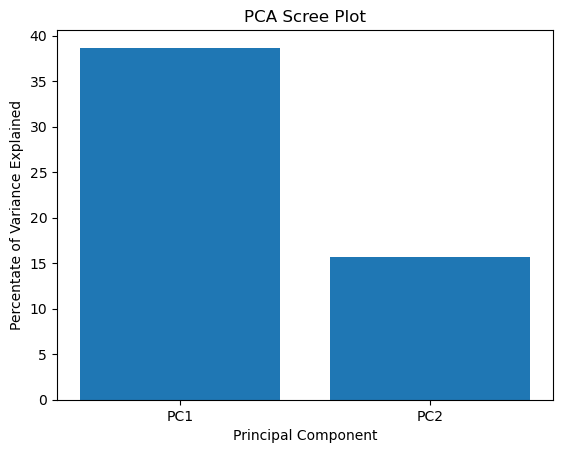

In [35]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']
x = range(1,3)
plt.bar(x, height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

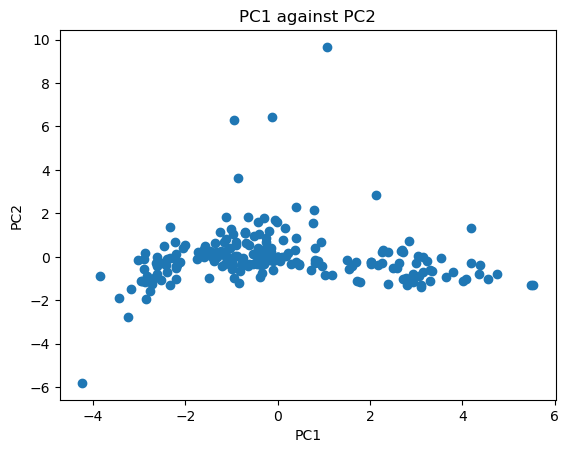

In [36]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

Explained Variance Ratio: [0.38678049 0.15670818]


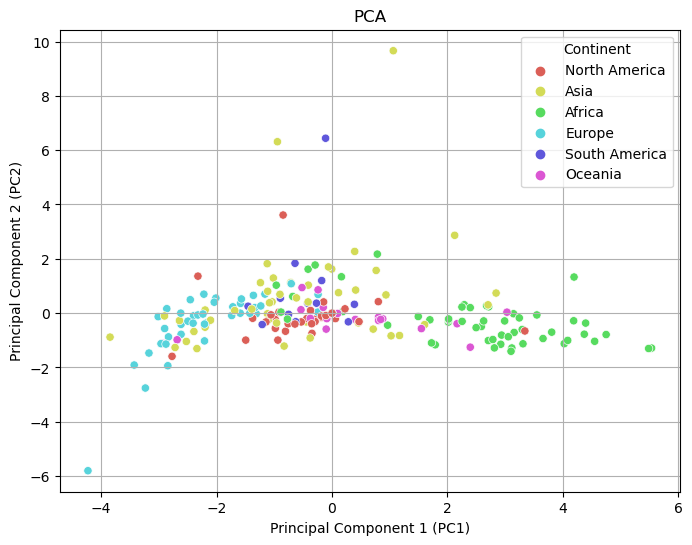

Most relevant predictor for PC1: hdi
Most relevant predictor for PC2: murder_total_deaths


In [37]:
# Print the explained variance ratio to see how much variance is explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the PCA graphic
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df2, hue="Continent", palette="hls")
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA')
plt.grid()
plt.show()

# Find the two most relevant predictors in terms of component loadings
component_loadings = pca.components_
absolute_loadings = np.abs(component_loadings)

# For PC1 (first principal component)
most_relevant_predictor_pc1 = X.columns[np.argmax(absolute_loadings[0, :])]

# For PC2 (second principal component)
most_relevant_predictor_pc2 = X.columns[np.argmax(absolute_loadings[1, :])]

# Print or store the most relevant predictors for each PC
print("Most relevant predictor for PC1:", most_relevant_predictor_pc1)
print("Most relevant predictor for PC2:", most_relevant_predictor_pc2)



## Interpretação da questão 5
* A partir do gráfico de dispersão pode-se observar que há muitas classes sobrepostas. Isso indica que apesar de PC1 e PC2, serem os Componentes Principais, ou seja, aqueles que possuem os maiores autovalores, não representam bem a seperação de classes. Algo que é visto também através do screeplot, pois os PC1 e PC2 somam menos de 60% da variação dos dados.

* Pelo gráfico de dispersão, observa-se que os continentes mais difíceis de serem discriminados são a América do Norte, América do Sul, Asia e Oceania, que estão na aréa mais central do gráfico. Já os continentes África e Europa econtram-se mais afastados do centro do gráfico e com menor sobreposição, de modo que são mais fáceis de serem diferenciados entre si e visualmente apresentam uma fronteira linear. Além disso, América do Norte e Europa também podem ser vistos dessa forma, apesar de estarem mais próximos.

In [38]:
print(absolute_loadings)

[[0.44132792 0.43409923 0.45681231 0.44482504 0.28919768 0.03247678
  0.00499634 0.29516744 0.1168035  0.11727675 0.10490474]
 [0.02716936 0.11387685 0.00268479 0.06354656 0.23895243 0.53566307
  0.52789217 0.2726516  0.0277104  0.34205214 0.4091928 ]]
